#Final Year Project


## Imports and Installing Packages

In [ ]:
#Range of Imports for Tensorflow, Scikit Learn, UMAP, Classifcation and Accuracy Scores and Metrics
from sklearn.datasets import load_digits

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from skimage import feature
from sklearn import linear_model, metrics, model_selection
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, hinge_loss, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

### Mounting Google Drive

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/University/Year-3/Final Year Project/Code'

 data_processing_vggish.ipynb		  metadata.csv
 FYP.ipynb				  process_vggish.ipynb
'Kopie von Ecoacoustics Notebook.ipynb'


In [ ]:
#Loading pre trained representations
rep_file = np.load('representations_habitat.npz')
representations = rep_file['representation']
#Specifying labels 
labels = rep_file['label']
#Habitat Labels
HABITAT_LABEL_NAMES = ['UK1', 'UK2', 'EC1', 'EC3', 'EC2', 'UK3']

## Data Set Up

In [ ]:
#Checking shape of representations - important for NN later
representations.shape

In [ ]:
print(labels)

In [ ]:
print(representations)

### Visualisation

In [ ]:
#Train Test split with pre-trained representations
train_data, test_data, train_labels, test_labels  = train_test_split(representations,labels, test_size=0.2, random_state=1)

In [ ]:
train_data.shape

(3780, 128)

In [ ]:
train_labels.shape

(3780,)

## Pre-Trained Data

### Testing Classifiers
Training Data

### Random Forest Classifier (Similar to Sethi study)

In [ ]:
#Random Forest
#Including Pipeline for feature selectioon and Classification
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import sklearn.metrics as metrics
#Pipeline - including ExtraTreesClassifier
#hyperparameters for classifier
rf_clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
  ('classification', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                                            warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
])
rf_clf.fit(train_data,train_labels)
rf_pred = rf_clf.predict(test_data) # Prediction after learning

#print('Process completed in %d epochs' % slp_clf.n_iter_['classification'])
print('Classification accuracy = %d' % accuracy_score(test_labels, rf_pred, normalize=False))
print(confusion_matrix(test_labels, rf_pred)) # Confusion matrix

Classification accuracy = 840
[[123  24   0   1   0   5]
 [ 14 127   0   0   0   5]
 [  1   0 155   3   6   0]
 [  0   0   6 150  13   6]
 [  4   0   6   8 149   0]
 [  0   2   0   0   1 136]]


In [ ]:
#Accuracy
metrics.accuracy_score(test_labels,rf_pred)

0.8888888888888888

In [ ]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(test_labels,rf_pred, average='macro')

0.8881586589035568

In [ ]:
#Precision
from sklearn.metrics import precision_score
precision_score(test_labels,rf_pred, average='macro')

0.8877876379859138

In [ ]:
#Recall
from sklearn.metrics import recall_score
recall_score(test_labels,rf_pred, average='macro')

0.8901590356520339

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


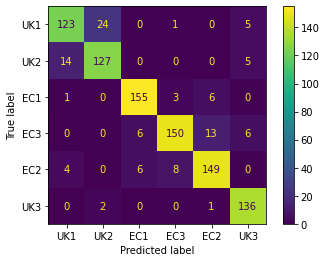

In [ ]:
#Metrics Plot
metrics.plot_confusion_matrix(rf_clf, X=test_data ,y_true=test_labels, display_labels=HABITAT_LABEL_NAMES, values_format='d')

### Multilayer Perceptron (different approach)

In [ ]:
#MLP - different to Random Forest utilised in Sethi study
#Proves more accurate and utilises a similar Pipeline with a ExtraTreesClassifier for feature selection
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
mlp_clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
  ('classification', MLPClassifier(activation='relu',solver='sgd',learning_rate='adaptive', hidden_layer_sizes=(1000), shuffle=True,
                    learning_rate_init=0.7,random_state = 2, momentum=0.5, nesterovs_momentum=False, max_iter=500,beta_1 =0.9, beta_2 = 0.999, epsilon = 1e-8))
])
mlp_clf.fit(train_data, train_labels)

pred_class2 = mlp_clf.predict(test_data)

#print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(test_labels, pred_class2, normalize=False))
print(confusion_matrix(test_labels,pred_class2)) # Confusion matrix

Classification accuracy = 890
[[141  10   0   0   0   2]
 [  9 135   1   0   0   1]
 [  0   0 158   2   5   0]
 [  0   0   5 161   8   1]
 [  2   0   3   6 156   0]
 [  0   0   0   0   0 139]]


In [ ]:
#Accuracy Score
metrics.accuracy_score(test_labels,pred_class2)

0.9417989417989417

In [ ]:
#F1 score
from sklearn.metrics import f1_score
f1_score(test_labels,pred_class2, average='macro')

0.9424443312387826

In [ ]:
#Precision 
from sklearn.metrics import precision_score
precision_score(test_labels,pred_class2, average='macro')

0.9420902438559189

In [ ]:
#Recall
from sklearn.metrics import recall_score
recall_score(test_labels,pred_class2, average='macro')

0.9429889426333765

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


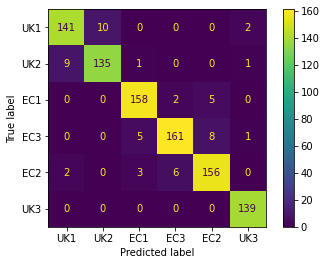

In [ ]:
#CF Matrix
metrics.plot_confusion_matrix(mlp_clf, X=test_data ,y_true=test_labels, display_labels=HABITAT_LABEL_NAMES, values_format='d')

### AdaBoost Classifier

In [ ]:
#AdaBoost setup - a trial classifier to see if any other results can be achieved
ada = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
ada.fit(train_data, train_labels)

AdaBoostClassifier()

In [ ]:
#Accuracy Score
ada_predictions = ada.predict(test_data)
metrics.accuracy_score(ada_predictions, test_labels)

0.6031746031746031

In [ ]:
#F1 score
from sklearn.metrics import f1_score
f1_score(test_labels,ada_predictions, average='macro')

0.6062765349245496

In [ ]:
#Precision 
from sklearn.metrics import precision_score
precision_score(test_labels,ada_predictions, average='macro')

0.6106391724155333

In [ ]:
#Recall
from sklearn.metrics import recall_score
recall_score(test_labels,ada_predictions, average='macro')

0.6097310345827714

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


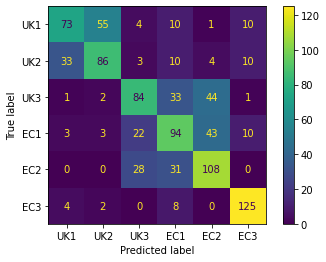

In [ ]:
#CF Matrix
metrics.plot_confusion_matrix(ada, X=test_data ,y_true=test_labels, display_labels=_HABITAT_LABEL_NAMES, values_format='d')

## Metadata Analysis

In [ ]:
#Loading metadata
meta_data = pd.read_csv('/content/drive/My Drive/University/Year-3/Final Year Project/Code/metadata.csv')

In [ ]:
#shape
meta_data.shape
print(meta_data)

In [ ]:
meta_data.head()

Unnamed: 0                                   filePath_pt  \
0           0     MelSpectrogram/PL-06_0_20150604_0700=0.pt   
1           1     MelSpectrogram/PL-06_0_20150604_0645=0.pt   
2           2  MelSpectrogram/KNEPP-09_0_20150511_0400=0.pt   
3           3     MelSpectrogram/PL-13_0_20150603_0445=0.pt   
4           4     MelSpectrogram/TE-14_1_20150716_0705=0.pt   

                     fileName_pt                  baseFile  \
0     PL-06_0_20150604_0700=0.pt     PL-06_0_20150604_0700   
1     PL-06_0_20150604_0645=0.pt     PL-06_0_20150604_0645   
2  KNEPP-09_0_20150511_0400=0.pt  KNEPP-09_0_20150511_0400   
3     PL-13_0_20150603_0445=0.pt     PL-13_0_20150603_0445   
4     TE-14_1_20150716_0705=0.pt     TE-14_1_20150716_0705   

                           filePath_wav                  fileName_wav  FileNo  \
0     UK_BIRD/PL-06_0_20150604_0700.wav     PL-06_0_20150604_0700.wav       3   
1     UK_BIRD/PL-06_0_20150604_0645.wav     PL-06_0_20150604_0645.wav     285   
2  UK_BIRD/KNEPP-09_0_20150511_0400.wav  KNEPP-09_0_20150511_0400.wav    1076   
3     UK_BIRD/PL-13_0_20150603_0445.wav     PL-13_0_20150603_0445.wav     380   
4     EC_BIRD/TE-14_1_20150716_0705.wav     TE-14_1_20150716_0705.wav    2214   

  habitat    site  time  ...  Spec_Cen__max_le  Spec_Cen__median_le  \
0     UK1   UK1-6   225  ...                -1                   -1   
1     UK1   UK1-6   210  ...                -1                   -1   
2     UK2   UK2-9    15  ...                -1                   -1   
3     UK1  UK1-13    90  ...                -1                   -1   
4     EC1  EC1-14   705  ...                 0                    0   

   Spec_Cen__var_le  Spec_Cen__mean_le  ZCR__median_le  human_le  other_le  \
0                -1                 -1              -1        -1        -1   
1                -1                 -1              -1        -1        -1   
2                -1                 -1              -1        -1        -1   
3                -1                 -1              -1        -1        -1   
4                 0                  0               0         0         0   

   other.desc_le  mammals.._le  other.1_le  
0             -1            -1          -1  
1             -1            -1          -1  
2             -1            -1          -1  
3             -1            -1          -1  
4             -1             0          -1  

[5 rows x 151 columns]

convert from absolute to minutes from sunrise in ec1


- treat back as string num
-front as hours + 60
- then subtract by sunrise 

In [ ]:
#function to convert time from absolute time to minutes from sunrise in equador
#as further explained in report
def convert_time(EC_c):
  EC_c2 = []
  for time in EC_c:
    if(len(str(time)) == 3): #add zero to all time values with length of 3
      timeStr = "0" + str(time)
    else:
      timeStr = str(time)
    temp = timeStr[0] + timeStr[1]
    timeH = 60 * int(temp) # multiply by 60 to obtain minutes

    temp2 = timeStr[2] + timeStr[3]
    time = timeH + int(temp2) #add minutes together 

    timeT = time - 373 # subtract by 373 to obtain sunrise time 
    EC_c2.append(timeT)
  return EC_c2


In [ ]:
#pandas notation to convert time in all Ecuadorian habitats
meta_data.loc[meta_data['habitat'] == 'EC1', 'time'] = convert_time(meta_data.loc[meta_data['habitat'] == 'EC1', 'time'].to_list())
meta_data.loc[meta_data['habitat'] == 'EC2', 'time'] = convert_time(meta_data.loc[meta_data['habitat'] == 'EC2', 'time'].to_list())
meta_data.loc[meta_data['habitat'] == 'EC3', 'time'] = convert_time(meta_data.loc[meta_data['habitat'] == 'EC3', 'time'].to_list())

In [ ]:
#printing specific row and colum locations to check if values have been converted 
#accurately
print(meta_data.loc[meta_data['habitat'] == 'EC1', 'time'])
print(meta_data.loc[meta_data['habitat'] == 'EC2', 'time'])
print(meta_data.loc[meta_data['habitat'] == 'EC3', 'time'])

4        52
20      757
27      772
30       22
32       27
       ... 
4712    722
4715     12
4719     27
4720    752
4723     12
Name: time, Length: 900, dtype: int64
9        32
11        7
13       32
14      787
16        7
       ... 
4684      2
4685    747
4696    752
4697     32
4704     22
Name: time, Length: 900, dtype: int64
5        17
8        37
23      752
24        2
28       27
       ... 
4702     22
4703    752
4707    722
4717      2
4722     32
Name: time, Length: 900, dtype: int64


In [ ]:
meta_data.head()

Unnamed: 0                                   filePath_pt  \
0           0     MelSpectrogram/PL-06_0_20150604_0700=0.pt   
1           1     MelSpectrogram/PL-06_0_20150604_0645=0.pt   
2           2  MelSpectrogram/KNEPP-09_0_20150511_0400=0.pt   
3           3     MelSpectrogram/PL-13_0_20150603_0445=0.pt   
4           4     MelSpectrogram/TE-14_1_20150716_0705=0.pt   

                     fileName_pt                  baseFile  \
0     PL-06_0_20150604_0700=0.pt     PL-06_0_20150604_0700   
1     PL-06_0_20150604_0645=0.pt     PL-06_0_20150604_0645   
2  KNEPP-09_0_20150511_0400=0.pt  KNEPP-09_0_20150511_0400   
3     PL-13_0_20150603_0445=0.pt     PL-13_0_20150603_0445   
4     TE-14_1_20150716_0705=0.pt     TE-14_1_20150716_0705   

                           filePath_wav                  fileName_wav  FileNo  \
0     UK_BIRD/PL-06_0_20150604_0700.wav     PL-06_0_20150604_0700.wav       3   
1     UK_BIRD/PL-06_0_20150604_0645.wav     PL-06_0_20150604_0645.wav     285   
2  UK_BIRD/KNEPP-09_0_20150511_0400.wav  KNEPP-09_0_20150511_0400.wav    1076   
3     UK_BIRD/PL-13_0_20150603_0445.wav     PL-13_0_20150603_0445.wav     380   
4     EC_BIRD/TE-14_1_20150716_0705.wav     TE-14_1_20150716_0705.wav    2214   

  habitat    site  time  ...  Spec_Cen__max_le  Spec_Cen__median_le  \
0     UK1   UK1-6   225  ...                -1                   -1   
1     UK1   UK1-6   210  ...                -1                   -1   
2     UK2   UK2-9    15  ...                -1                   -1   
3     UK1  UK1-13    90  ...                -1                   -1   
4     EC1  EC1-14    52  ...                 0                    0   

   Spec_Cen__var_le  Spec_Cen__mean_le  ZCR__median_le  human_le  other_le  \
0                -1                 -1              -1        -1        -1   
1                -1                 -1              -1        -1        -1   
2                -1                 -1              -1        -1        -1   
3                -1                 -1              -1        -1        -1   
4                 0                  0               0         0         0   

   other.desc_le  mammals.._le  other.1_le  
0             -1            -1          -1  
1             -1            -1          -1  
2             -1            -1          -1  
3             -1            -1          -1  
4             -1             0          -1  

[5 rows x 151 columns]

In [ ]:
#converting meta data to numpy to simplify work with UMAP
#Slicing, extracting and finding values in numpy easier than in pandas
meta_data_np = meta_data.to_numpy()

In [ ]:
#Extracting individual data instances from table - necessary for neural network
#allows multivariable prediction
time = meta_data_np[:,9]
species_abundance = meta_data_np[:,10]
species_richness = meta_data_np[:,11]
hab_labels = meta_data_np[:,7]

In [ ]:
#Adding the labels to one variable to help prediction - using stack to put them into individual columns
hab_health = np.stack((hab_labels, time, species_abundance, species_richness), axis = 1)
hab_health.shape

(4725, 4)

In [ ]:
representations.shape

(4725, 128)

Pytorch and Tensorflow for recurrent neural network time-spatial data

Convert columns to numpy array and then labels then train on it 

In [ ]:
#Assigning all data given unique habitat
#Extracting rows with specific habitat value - using np.where
UK1 = meta_data_np[np.where(meta_data_np[:,7] == 'UK1')]     
UK2 = meta_data_np[np.where(meta_data_np[:,7] == 'UK2')]
UK3 = meta_data_np[np.where(meta_data_np[:,7] == 'UK3')]
EC1 = meta_data_np[np.where(meta_data_np[:,7] == 'EC1')]
EC2 = meta_data_np[np.where(meta_data_np[:,7] == 'EC2')]
EC3 = meta_data_np[np.where(meta_data_np[:,7] == 'EC3')]

In [ ]:
UK1.shape, UK2.shape, UK3.shape, EC1.shape, EC2.shape, EC3.shape

((675, 151), (675, 151), (675, 151), (900, 151), (900, 151), (900, 151))

In [ ]:
#using numpy capabilities representations linked to specific habitat can 
#easily be extracted assigned to a new variable
UK1_representations = representations[np.where(meta_data_np[:,7] == 'UK1')]  
UK2_representations = representations[np.where(meta_data_np[:,7] == 'UK2')]  
UK3_representations = representations[np.where(meta_data_np[:,7] == 'UK3')]  
EC1_representations = representations[np.where(meta_data_np[:,7] == 'EC1')]  
EC2_representations = representations[np.where(meta_data_np[:,7] == 'EC2')]  
EC3_representations = representations[np.where(meta_data_np[:,7] == 'EC3')]  
#print statements to check if done accurately
print(np.where(meta_data_np[:,7] == 'UK1')) 
print(meta_data_np[:,7] == 'UK1')

(array([   0,    1,    3,   12,   31,   33,   65,   68,   80,   93,   98,
        107,  123,  126,  144,  145,  170,  174,  180,  187,  221,  223,
        224,  230,  231,  234,  236,  244,  245,  250,  257,  261,  288,
        291,  296,  302,  307,  315,  331,  338,  339,  346,  347,  348,
        357,  363,  369,  371,  375,  379,  406,  426,  437,  439,  446,
        466,  467,  468,  469,  479,  481,  505,  512,  515,  521,  536,
        546,  547,  554,  559,  561,  566,  573,  575,  582,  584,  590,
        591,  596,  609,  610,  622,  631,  633,  641,  642,  664,  669,
        670,  673,  680,  682,  690,  699,  708,  731,  740,  743,  762,
        763,  767,  769,  773,  774,  775,  776,  779,  780,  786,  793,
        795,  796,  798,  811,  817,  819,  824,  851,  862,  870,  876,
        885,  886,  888,  906,  929,  942,  949,  959,  966,  969,  986,
        988,  991, 1015, 1021, 1034, 1043, 1048, 1049, 1053, 1064, 1079,
       1080, 1093, 1100, 1101, 1108, 1109, 1114, 1

In [ ]:
UK1_representations.shape, UK2_representations.shape, UK3_representations.shape, EC1_representations.shape, EC2_representations.shape, EC3_representations.shape

((675, 128), (675, 128), (675, 128), (900, 128), (900, 128), (900, 128))

In [ ]:
#Put respective columns of interest (times, species abundance and species richness) 
#into unique variable for datasplitting and regression
#9 - time
UK1_time = UK1[:,9]
#10 - species abundance
UK1_species_abundance = UK1[:,10]
#11 - species richness
UK1_species_richness = UK1[:,11]

UK2_time = UK2[:,9]
UK2_species_abundance = UK2[:,10]
UK2_species_richness = UK2[:,11]

UK3_time = UK3[:,9]
UK3_species_abundance = UK3[:,10]
UK3_species_richness = UK3[:,11]

EC1_time = EC1[:,9]
EC1_species_abundance = EC1[:,10]
EC1_species_richness = EC1[:,11]

EC2_time = EC2[:,9]
EC2_species_abundance = EC2[:,10]
EC2_species_richness = EC2[:,11]

EC3_time = EC3[:,9]
EC3_species_abundance = EC3[:,10]
EC3_species_richness = EC3[:,11]


Put labels for each Habitat into one variable

In [ ]:
#stack information from individual habitats together to simplify regression
UK1_hab_health = np.stack((UK1_time, UK1_species_abundance, UK1_species_richness), axis = 1)
UK2_hab_health = np.stack((UK2_time, UK2_species_abundance, UK2_species_richness), axis = 1)
UK3_hab_health = np.stack((UK3_time, UK3_species_abundance, UK3_species_richness), axis = 1)
EC1_hab_health = np.stack((EC1_time, EC1_species_abundance, EC1_species_richness), axis = 1)
EC2_hab_health = np.stack((EC2_time, EC2_species_abundance, EC2_species_richness), axis = 1)
EC3_hab_health = np.stack((EC3_time, EC3_species_abundance, EC3_species_richness), axis = 1)
UK1_hab_health.shape, UK2_hab_health.shape, UK3_hab_health.shape, EC1_hab_health.shape, EC2_hab_health.shape, EC3_hab_health.shape

((675, 3), (675, 3), (675, 3), (900, 3), (900, 3), (900, 3))

Train-Test Splits for all unique Habitats

In [ ]:
#Train Test split for linear regression and random forest classifier using regression
UK1_train_metadata, UK1_test_metadata, UK1_train_metalabels, UK1_test_metalabels  = train_test_split(UK1_representations, UK1_hab_health, test_size=0.2, random_state=1)                                                                                               
UK2_train_metadata, UK2_test_metadata, UK2_train_metalabels, UK2_test_metalabels  = train_test_split(UK2_representations, UK2_hab_health, test_size=0.2, random_state=1)
UK3_train_metadata, UK3_test_metadata, UK3_train_metalabels, UK3_test_metalabels  = train_test_split(UK3_representations, UK3_hab_health, test_size=0.2, random_state=1)
EC1_train_metadata, EC1_test_metadata, EC1_train_metalabels, EC1_test_metalabels  = train_test_split(EC1_representations, EC1_hab_health, test_size=0.2, random_state=1)
EC2_train_metadata, EC2_test_metadata, EC2_train_metalabels, EC2_test_metalabels  = train_test_split(EC2_representations, EC2_hab_health, test_size=0.2, random_state=1)
EC3_train_metadata, EC3_test_metadata, EC3_train_metalabels, EC3_test_metalabels  = train_test_split(EC3_representations, EC3_hab_health, test_size=0.2, random_state=1)

#Shapes to help circumnavigate errors 
UK1_train_metadata.shape, UK1_test_metadata.shape, UK1_train_metalabels.shape, UK1_test_metalabels.shape
UK2_train_metadata.shape, UK2_test_metadata.shape, UK2_train_metalabels.shape, UK2_test_metalabels.shape
UK3_train_metadata.shape, UK3_test_metadata.shape, UK3_train_metalabels.shape, UK3_test_metalabels.shape
EC1_train_metadata.shape, EC1_test_metadata.shape, EC1_train_metalabels.shape, EC1_test_metalabels.shape
EC2_train_metadata.shape, EC2_test_metadata.shape, EC2_train_metalabels.shape, EC2_test_metalabels.shape
EC3_train_metadata.shape, EC3_test_metadata.shape, EC3_train_metalabels.shape, EC3_test_metalabels.shape


((720, 128), (180, 128), (720, 3), (180, 3))

### UMAP stuff (using pre-trained representations)

In [ ]:
#UMAP imports 
import umap
import umap.plot

In [ ]:
representations.shape

(4725, 128)

#### UMAP for Habitat

No handles with labels found to put in legend.


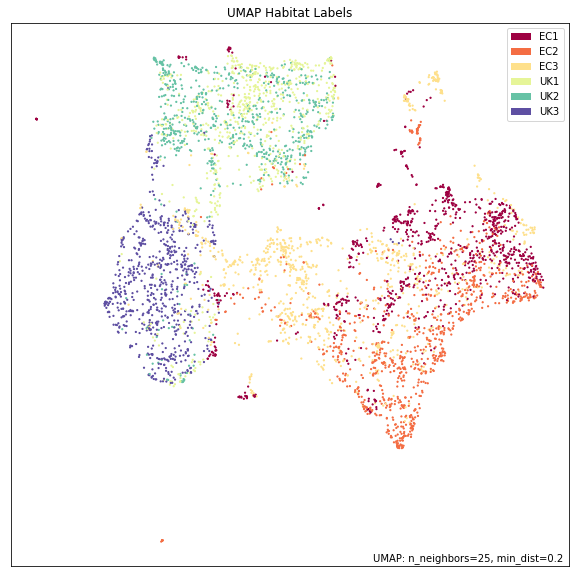

In [ ]:
#UMAP for habitats --> different points added to two dimensional space 
#Representations and the visualisations of the Habitats in this data 
fig, ax = plt.subplots(figsize=(10,10))
mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(representations)
labels_to_plot = []                                                                                                      
for lab in labels:
        labels_to_plot.append(HABITAT_LABEL_NAMES[lab])
ax.set_title('UMAP Habitat Labels')
ax.legend(loc= 'best')
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(mapper, labels=np.array(labels_to_plot), ax=ax)


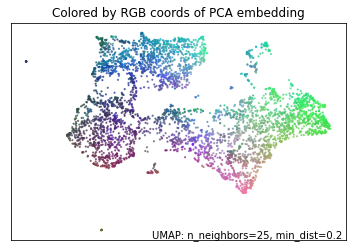

In [ ]:
#diagnostic plotting - pca embedding
umap.plot.diagnostic(mapper, diagnostic_type= 'pca')

embedding - representation in lower dimensional space

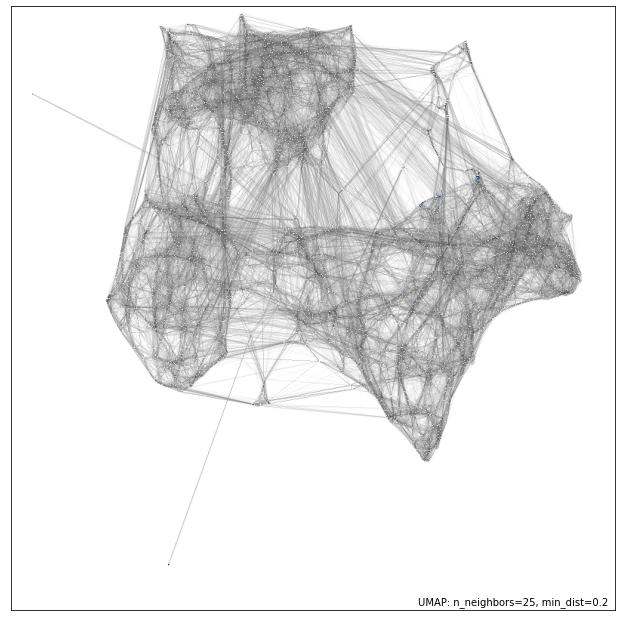

In [ ]:
#identifies connectivity between points
#shows embedding points as well
umap.plot.connectivity(mapper, show_points=True)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


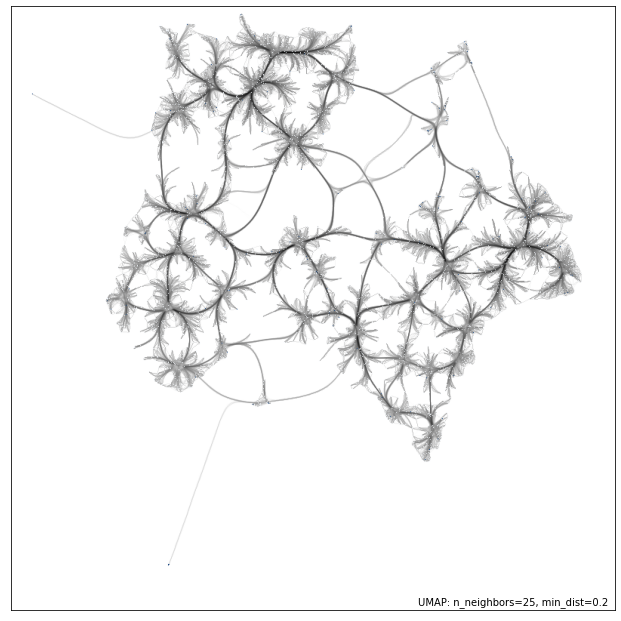

In [ ]:
#edge building using hammer - repeated for meta data as well
umap.plot.connectivity(mapper, edge_bundling='hammer', show_points=True)

In [ ]:
#potential notebook application for umap
umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels, point_size=2)
umap.plot.show(p)

#### UMAP for specifc habitats - time, species richness and species abudance 


Per habitat 3 graphs including time, species richeness and species abundance (UK1, UK2, UK3, EC1, EC2, EC3). Therefore 18 graphs in total. Code repeated for each habitat

##### UK1 (Forest Site)

Time UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
No handles with labels found to put in legend.


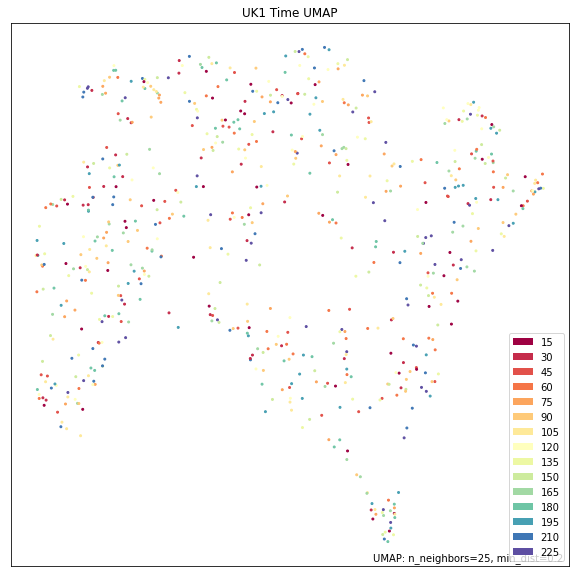

In [ ]:
#Mapper values and parameters are consistent throughout all habitats to ensure 
#useful and meaningful analysis between different habitats.
fig1, ax1 = plt.subplots(figsize=(10,10))
UK1_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(UK1_representations)
ax1.set_title('UK1 Time UMAP')
ax1.legend(loc= "upper left")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK1_mapper, UK1_time, ax=ax1)

Species Abundance UMAP

No handles with labels found to put in legend.


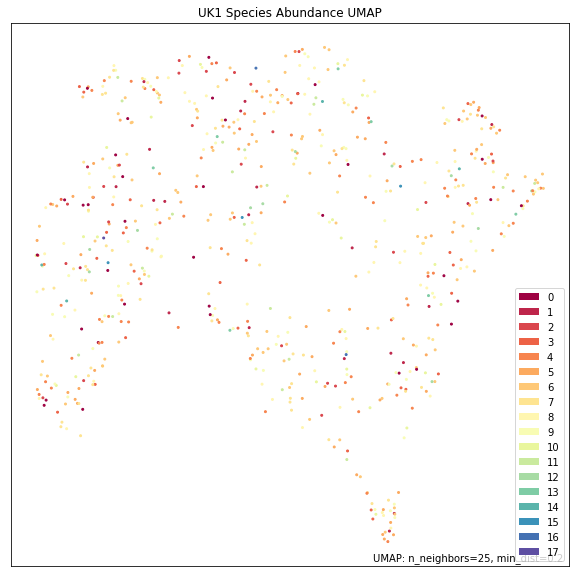

In [ ]:
fig2, ax2 = plt.subplots(figsize=(10,10))
#UK1_mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(UK1_representations)
ax2.set_title('UK1 Species Abundance UMAP')
ax2.legend(loc= 'upper left')
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK1_mapper, UK1_species_abundance, ax=ax2)

Species Richness UMAP

No handles with labels found to put in legend.


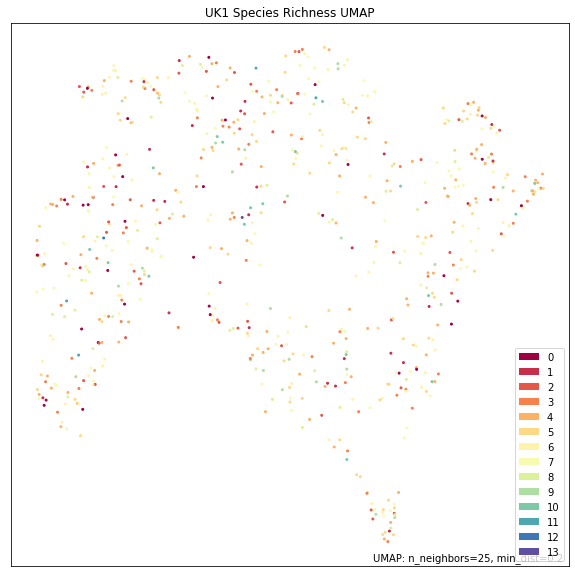

In [ ]:
fig3, ax3 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(UK1_representations)
ax3.set_title('UK1 Species Richness UMAP')
ax3.legend(loc= 'upper left')
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK1_mapper, UK1_species_richness, ax=ax3)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


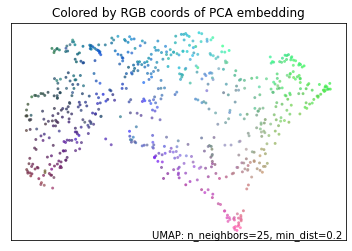

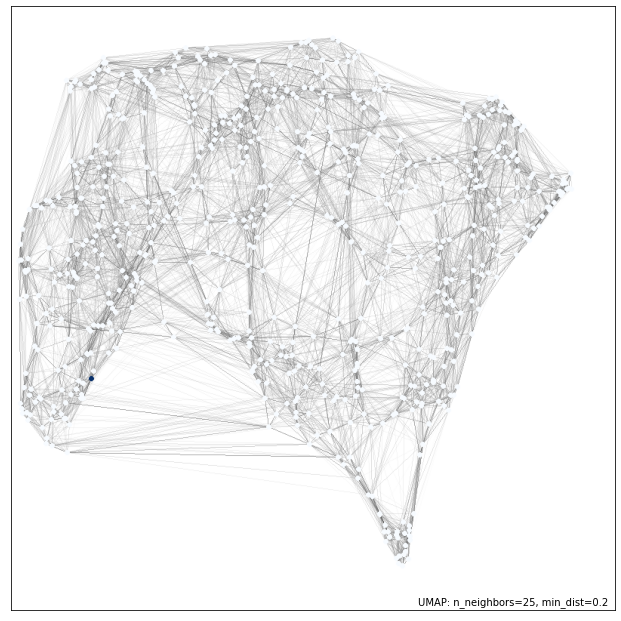

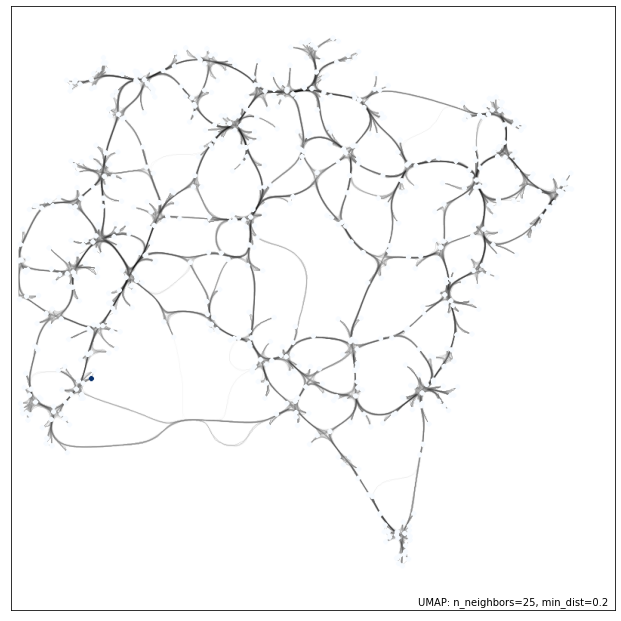

In [ ]:
#different types of plots including pca embedding and connectivity - repeated 
#for all following habitats and respective labels
umap.plot.diagnostic(UK1_mapper, diagnostic_type= 'pca')
umap.plot.connectivity(UK1_mapper, show_points=True)
umap.plot.connectivity(UK1_mapper, edge_bundling='hammer', show_points=True)

##### UK2 (Secondary Forest)

No handles with labels found to put in legend.


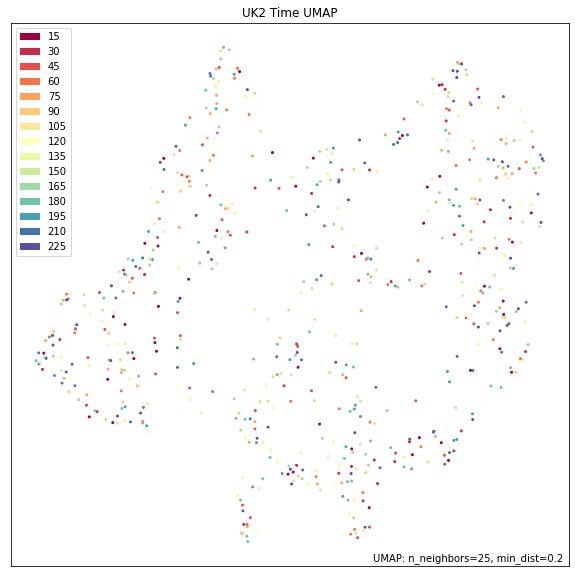

In [ ]:
fig4, ax4 = plt.subplots(figsize=(10,10))
UK2_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(UK2_representations)
ax4.set_title('UK2 Time UMAP')
ax4.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK2_mapper, UK2_time, ax=ax4)

No handles with labels found to put in legend.


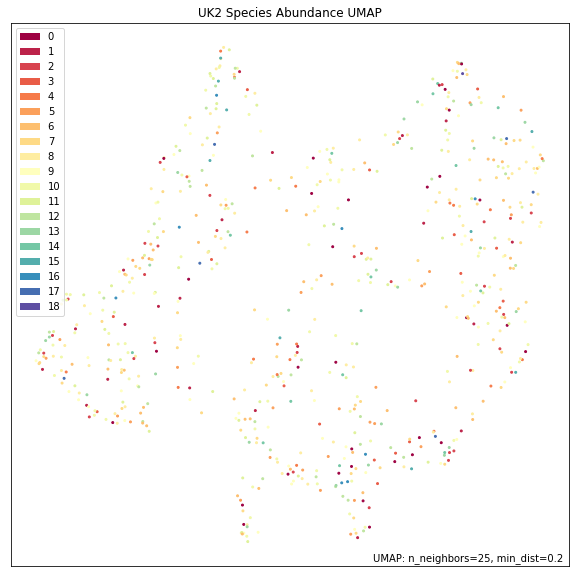

In [ ]:
fig5, ax5 = plt.subplots(figsize=(10,10))
#UK2_mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(UK2_representations)
ax5.set_title('UK2 Species Abundance UMAP')
ax5.legend(loc= "upper right")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK2_mapper, UK2_species_abundance, ax=ax5)

No handles with labels found to put in legend.


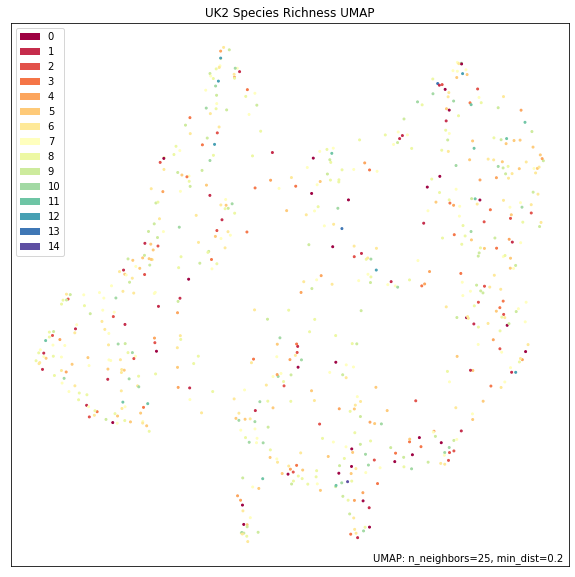

In [ ]:
fig6, ax6 = plt.subplots(figsize=(10,10))
#UK2_mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(UK2_representations)
ax6.set_title('UK2 Species Richness UMAP')
ax6.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK2_mapper, UK2_species_richness, ax=ax6)

/usr/local/lib/python3.7/dist-packages/datashader/transfer_functions/__init__.py:282: RuntimeWarning: invalid value encountered in true_divide
  scaled_data = (data - span[0])/(span[1] - span[0])
/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"
/usr/local/lib/python3.7/dist-packages/datashader/transfer_functions/__init__.py:282: RuntimeWarning: invalid value encountered in true_divide
  scaled_data = (data - span[0])/(span[1] - span[0])


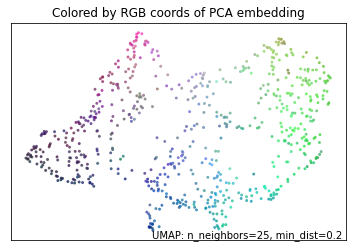

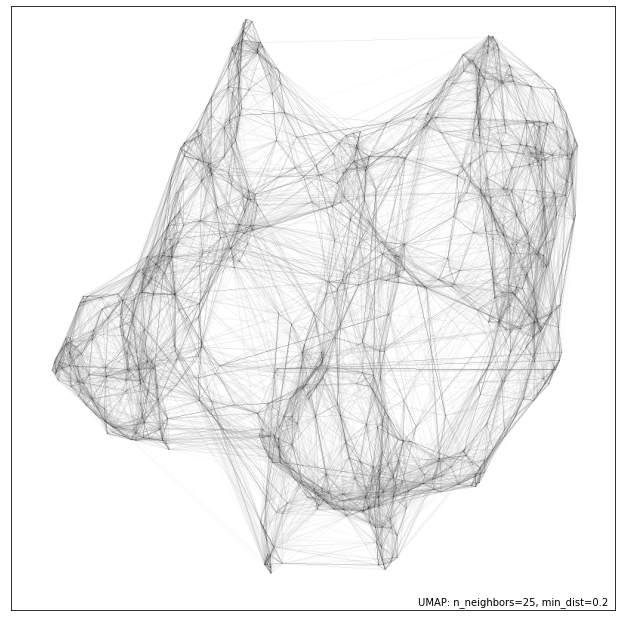

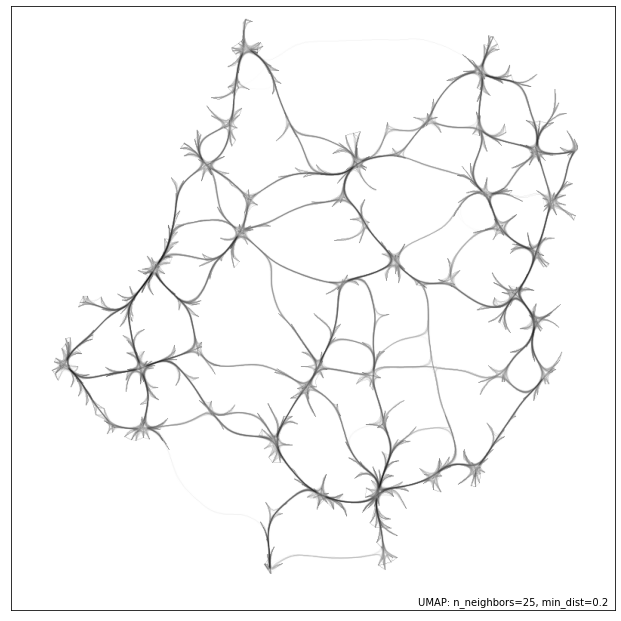

In [ ]:
umap.plot.diagnostic(UK2_mapper, diagnostic_type= 'pca')
umap.plot.connectivity(UK2_mapper, show_points=True)
umap.plot.connectivity(UK2_mapper, edge_bundling='hammer', show_points=True)

##### UK3 (Agricultural Land)

No handles with labels found to put in legend.


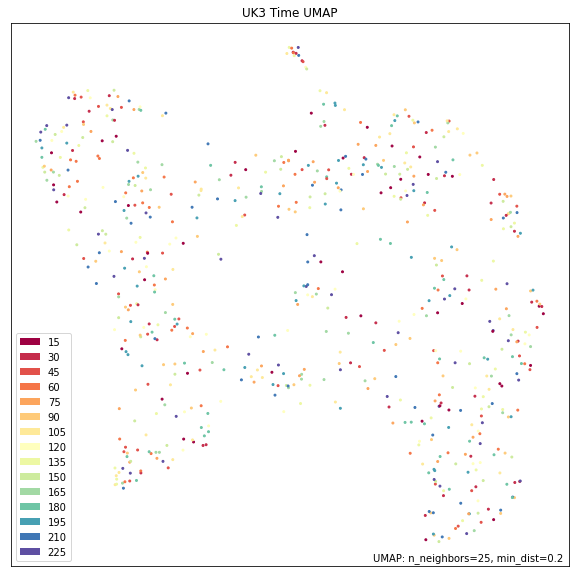

In [ ]:
fig7, ax7 = plt.subplots(figsize=(10,10))
UK3_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(UK3_representations)
ax7.set_title('UK3 Time UMAP')
ax7.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK3_mapper, UK3_time, ax=ax7)

No handles with labels found to put in legend.


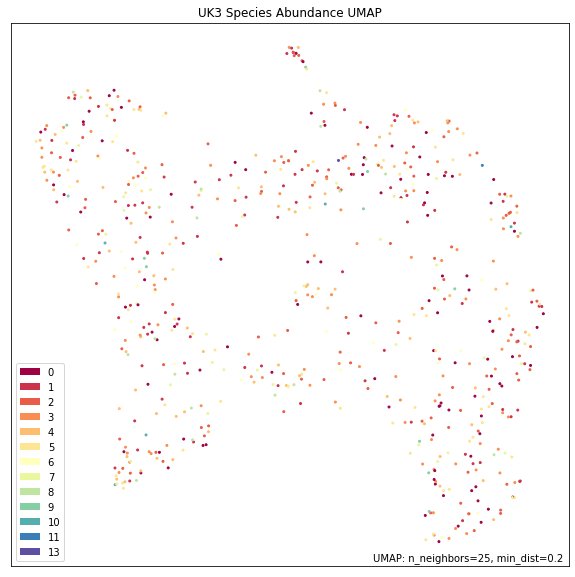

In [ ]:
fig8, ax8 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(UK3_representations)
ax8.set_title('UK3 Species Abundance UMAP')
ax8.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK3_mapper, UK3_species_abundance, ax=ax8)

No handles with labels found to put in legend.


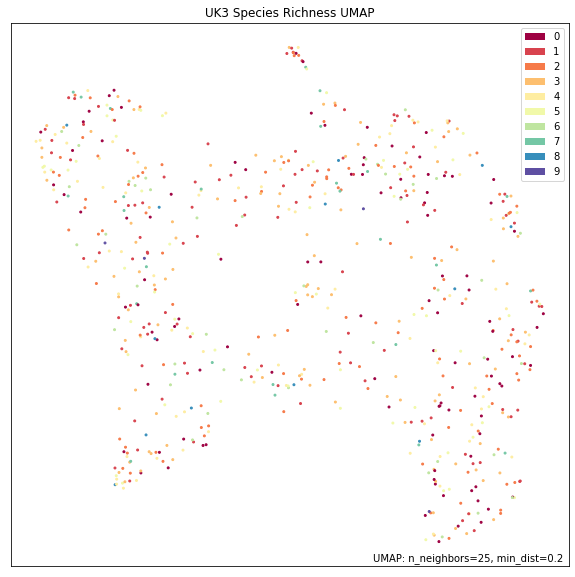

In [ ]:
fig9, ax9 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(UK3_representations)
ax9.set_title('UK3 Species Richness UMAP')
ax9.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(UK3_mapper, UK3_species_richness, ax=ax9)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


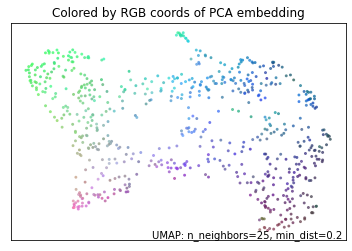

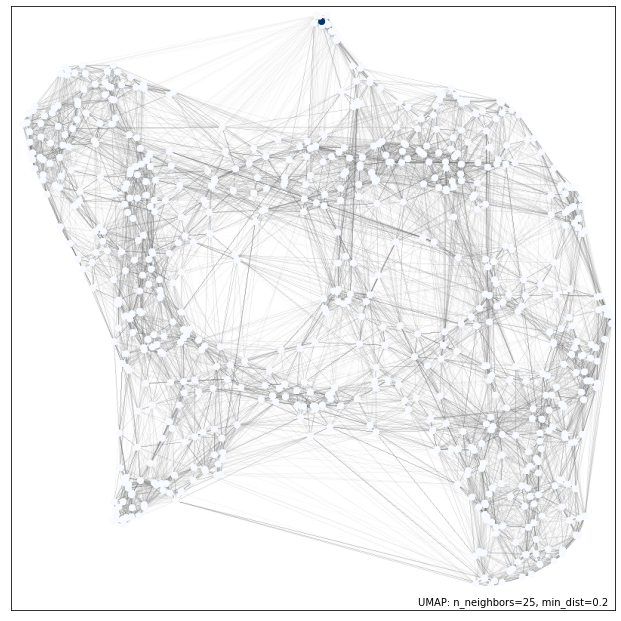

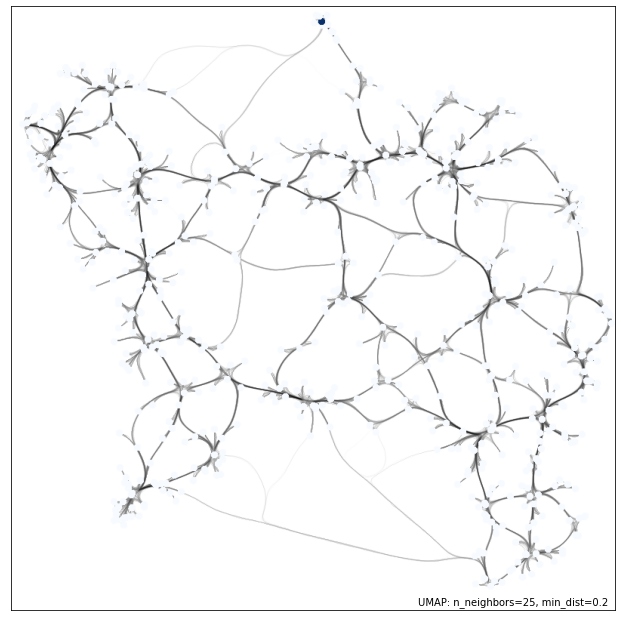

In [ ]:
umap.plot.diagnostic(UK3_mapper, diagnostic_type= 'pca')
umap.plot.connectivity(UK3_mapper, show_points=True)
umap.plot.connectivity(UK3_mapper, edge_bundling='hammer', show_points=True)

##### EC1 (Primary Forest)

No handles with labels found to put in legend.


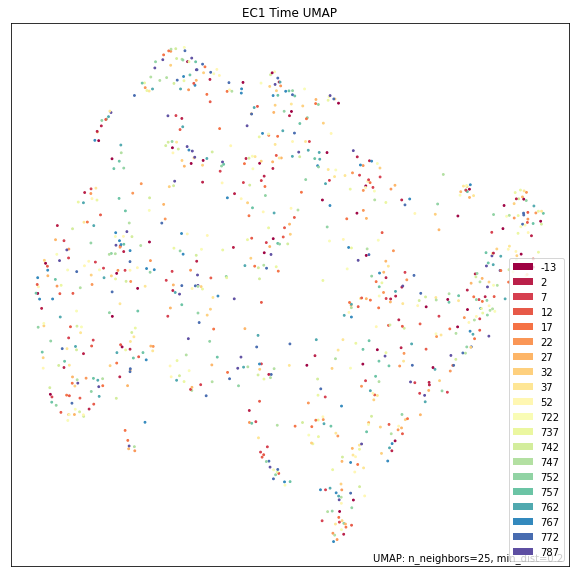

In [ ]:
fig10, ax10 = plt.subplots(figsize=(10,10))
EC1_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(EC1_representations)
ax10.set_title('EC1 Time UMAP')
ax10.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC1_mapper, EC1_time, ax=ax10)

No handles with labels found to put in legend.


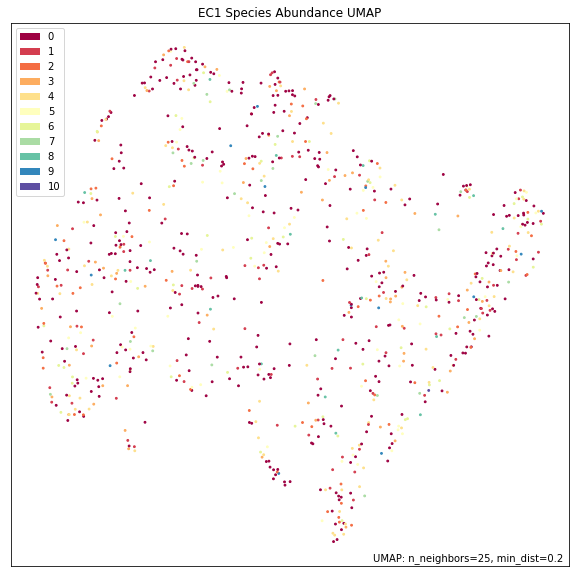

In [ ]:
fig11, ax11 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(EC1_representations)
ax11.set_title('EC1 Species Abundance UMAP')
ax11.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC1_mapper, EC1_species_abundance, ax=ax11)

No handles with labels found to put in legend.


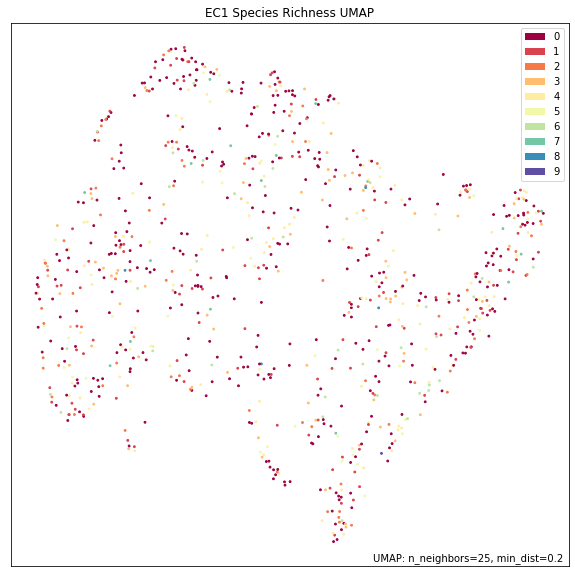

In [ ]:
fig12, ax12 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(EC1_representations)
ax12.set_title('EC1 Species Richness UMAP')
ax12.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC1_mapper, EC1_species_richness, ax=ax12)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


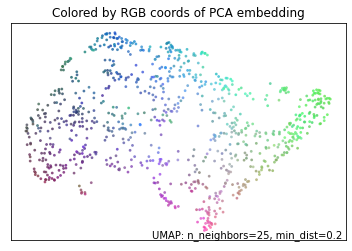

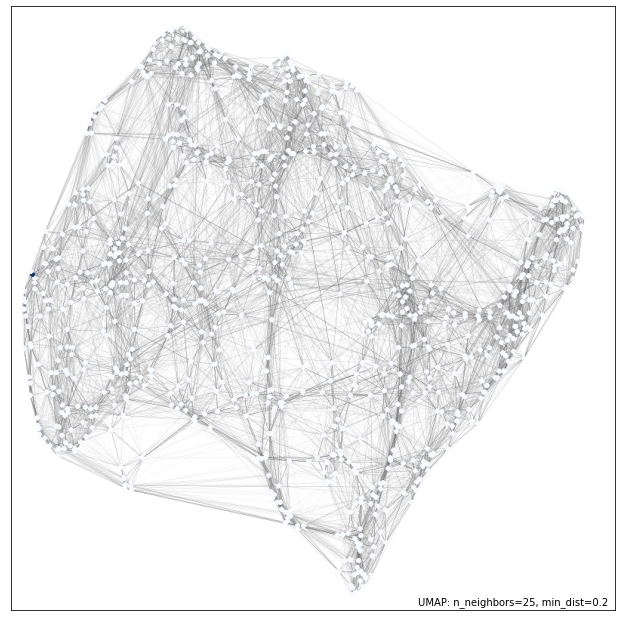

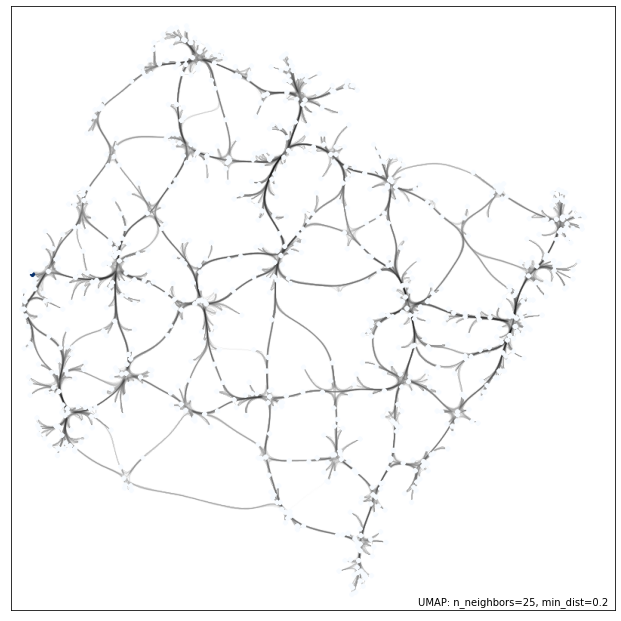

In [ ]:
umap.plot.diagnostic(EC1_mapper, diagnostic_type= 'pca')
umap.plot.connectivity(EC1_mapper, show_points=True)
umap.plot.connectivity(EC1_mapper, edge_bundling='hammer', show_points=True)

##### EC2 (Secondary Forest)

No handles with labels found to put in legend.


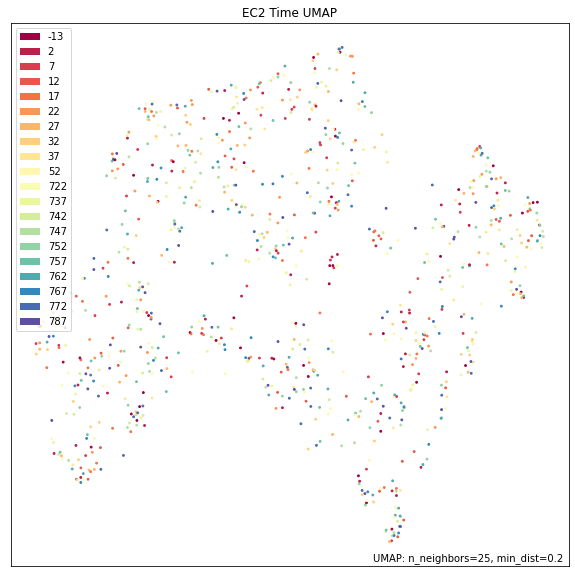

In [ ]:
fig13, ax13 = plt.subplots(figsize=(10,10))
EC2_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(EC2_representations)
ax13.set_title('EC2 Time UMAP')
ax13.legend(loc='best')
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC2_mapper, EC2_time, ax=ax13)

No handles with labels found to put in legend.


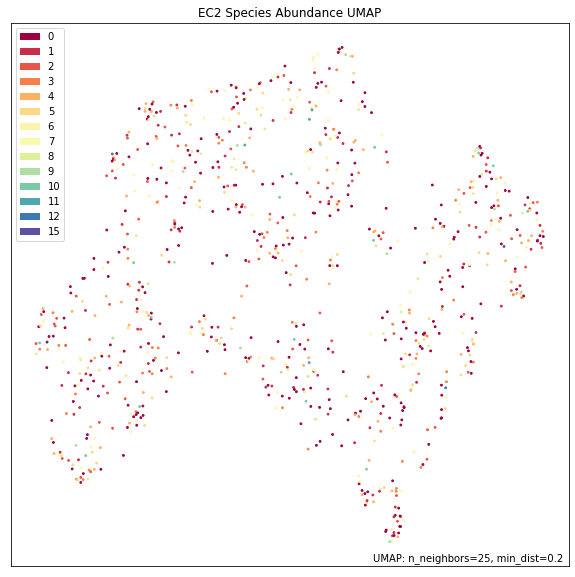

In [ ]:
fig14, ax14 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(EC2_representations)
ax14.set_title('EC2 Species Abundance UMAP')
ax14.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC2_mapper, EC2_species_abundance, ax=ax14)

No handles with labels found to put in legend.


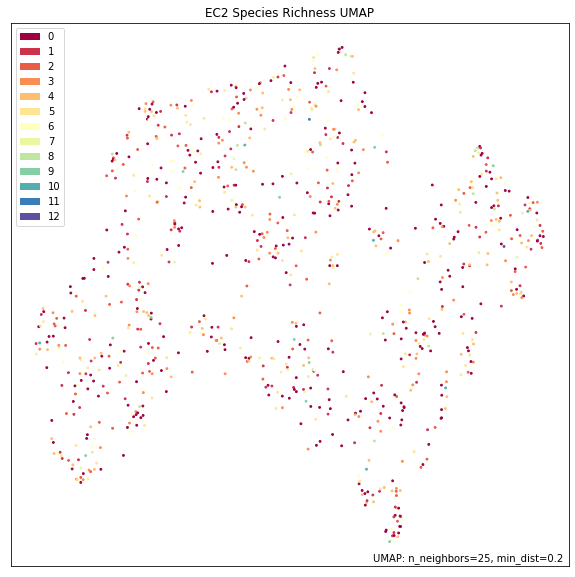

In [ ]:
fig15, ax15 = plt.subplots(figsize=(10,10))
#EC2_mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(EC2_representations)
ax15.set_title('EC2 Species Richness UMAP')
ax15.legend(loc = 'best')
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC2_mapper, EC2_species_richness, ax=ax15)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


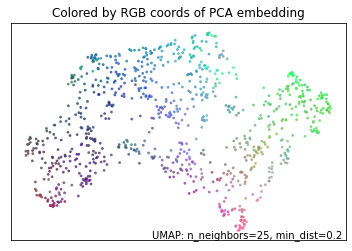

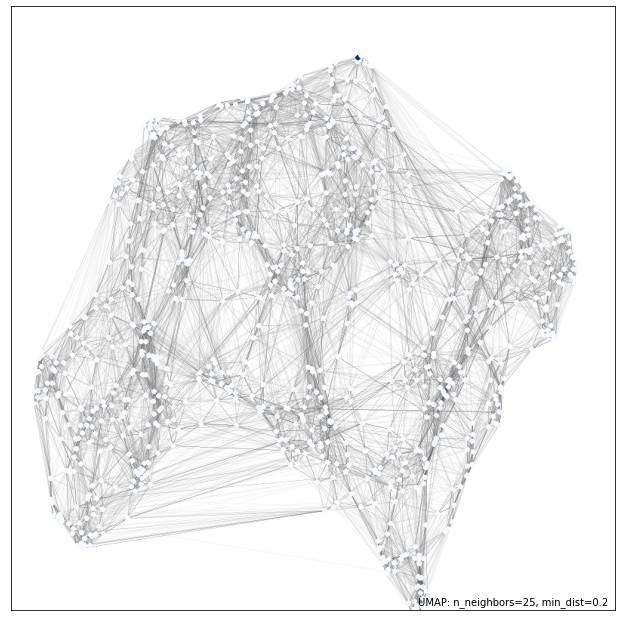

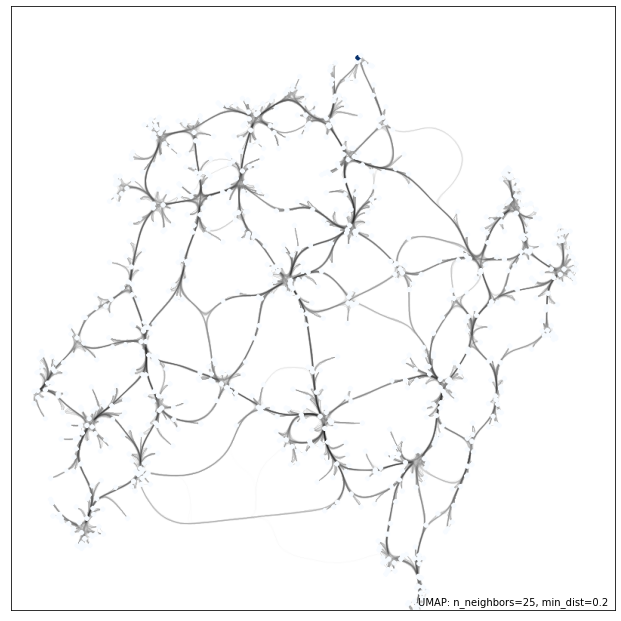

In [ ]:
umap.plot.diagnostic(EC2_mapper, diagnostic_type= 'pca')
umap.plot.connectivity(EC2_mapper, show_points=True)
umap.plot.connectivity(EC2_mapper, edge_bundling='hammer', show_points=True)

##### EC3 (Agricultural Land)

No handles with labels found to put in legend.


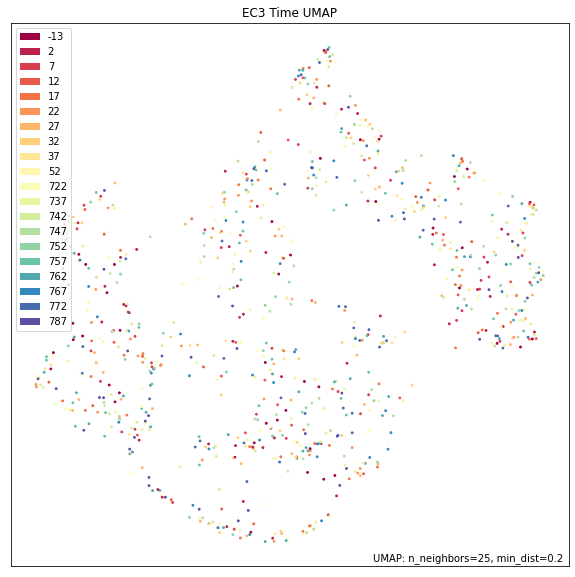

In [ ]:
fig16, ax16 = plt.subplots(figsize=(10,10))
EC3_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, n_components=2).fit(EC3_representations)
ax16.set_title('EC3 Time UMAP')
ax16.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC3_mapper, EC3_time, ax=ax16)

No handles with labels found to put in legend.


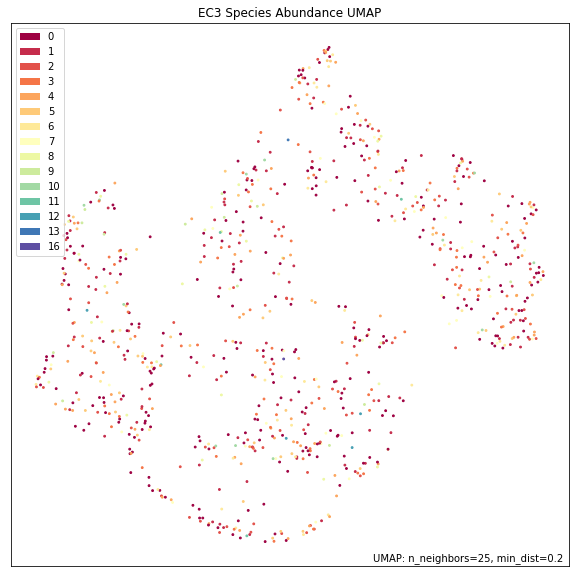

In [ ]:
fig17, ax17 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(EC3_representations)
ax17.set_title('EC3 Species Abundance UMAP')
ax17.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC3_mapper, EC3_species_abundance, ax=ax17)

No handles with labels found to put in legend.


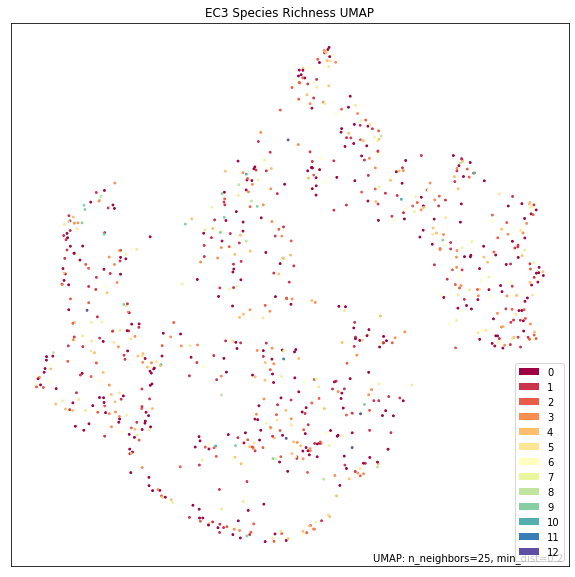

In [ ]:
fig18, ax18 = plt.subplots(figsize=(10,10))
#mapper = umap.UMAP(metric='euclidean', min_dist=0, n_neighbors=25, random_state=5, n_components=2).fit(EC3_representations)
ax18.set_title('EC3 Species Richness UMAP')
ax18.legend(loc= "best")
#ax.annotate("R2 = {:.3f}".format(mapper, (1250, 0)))
umap.plot.points(EC3_mapper, EC3_species_richness, ax=ax18)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


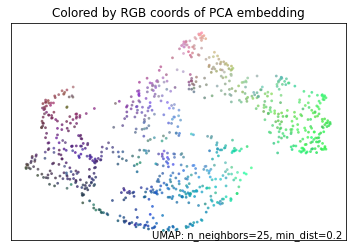

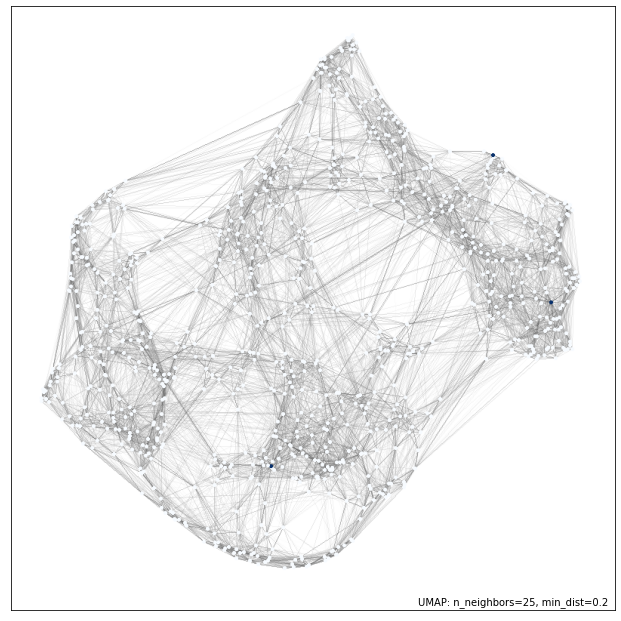

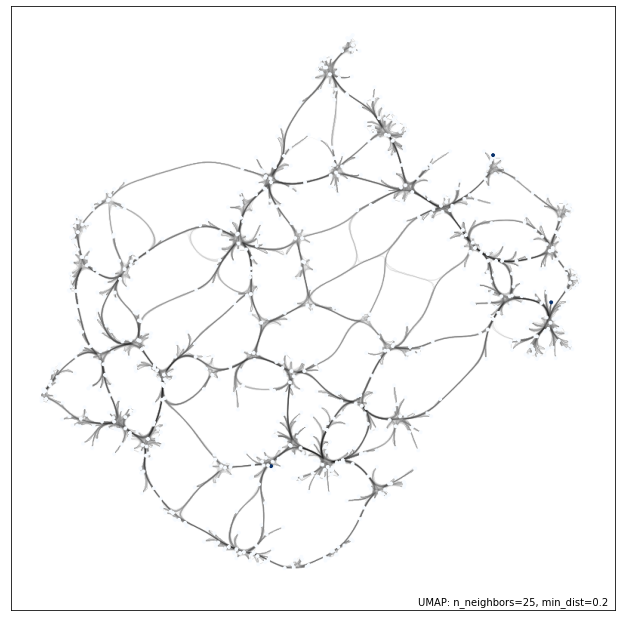

In [ ]:
umap.plot.diagnostic(EC3_mapper, diagnostic_type= 'pca')
umap.plot.connectivity(EC3_mapper, show_points=True)
umap.plot.connectivity(EC3_mapper, edge_bundling='hammer', show_points=True)

### Simple Classifier (Linear Regression)

#### LinearRegression UK1

In [ ]:
#Linear Regression as this is not a classification problem but a regression problem 
#Steps repeated for all other linear regression models for different habitats
from sklearn.linear_model import LinearRegression
UK1_lin_classifier = LinearRegression()
# Fit it to the data
UK1_lin_classifier.fit(UK1_train_metadata,UK1_train_metalabels)
#prediction 
import sklearn.metrics as metrics
UK1_lin_pred = UK1_lin_classifier.predict(UK1_test_metadata)

In [ ]:
#Accuracy score for all labels together
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK1_test_metalabels, UK1_lin_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Main Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK1_test_metalabels, UK1_lin_pred, sample_weight=None, multioutput='uniform_average', squared=False))
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(UK1_test_metalabels, UK1_lin_pred, sample_weight=None, multioutput='uniform_average'))

1839.4967885054737
26.88831149901492
-0.31811195620564153


In [ ]:
#Creating lists of values to store and split different labels - allows graphs to later
#show labels independent of each other - also done for lin_prediction value
#Repeated for all other habitats 
arr1 = []
arr2 = []
arr3 = []
for i in range(UK1_test_metalabels.shape[0]):
  arr1.append(UK1_test_metalabels[i][0])
  arr2.append(UK1_test_metalabels[i][1])
  arr3.append(UK1_test_metalabels[i][2])

#test_metalabels, lin_pred = test_metalabels[:], lin_pred[]
print(arr1)
print(arr2)
print(arr2)

lin_pred1 = []
lin_pred2 = []
lin_pred3 = []
for i in range(UK1_lin_pred.shape[0]):
  lin_pred1.append(UK1_lin_pred[i][0])
  lin_pred2.append(UK1_lin_pred[i][1])
  lin_pred3.append(UK1_lin_pred[i][2])

#test_metalabels, lin_pred = test_metalabels[:], lin_pred[]
print(lin_pred1)
print(lin_pred2)
print(lin_pred3)

[180, 150, 90, 210, 135, 120, 90, 180, 150, 75, 150, 75, 105, 195, 120, 225, 15, 180, 30, 75, 135, 120, 30, 45, 30, 15, 120, 135, 15, 45, 15, 150, 135, 180, 210, 60, 60, 30, 75, 15, 75, 165, 60, 105, 105, 150, 75, 180, 150, 15, 45, 195, 90, 135, 150, 135, 120, 90, 45, 180, 75, 165, 210, 75, 135, 225, 135, 60, 195, 150, 165, 45, 75, 105, 210, 90, 30, 225, 120, 225, 210, 165, 135, 60, 225, 180, 225, 45, 135, 150, 195, 135, 150, 30, 195, 135, 45, 150, 135, 15, 225, 210, 120, 225, 15, 150, 210, 90, 180, 75, 150, 45, 165, 165, 195, 165, 45, 105, 105, 90, 195, 75, 210, 30, 225, 105, 60, 135, 165, 210, 45, 45, 30, 195, 45]
[5, 13, 5, 5, 8, 7, 9, 7, 8, 6, 6, 8, 12, 10, 7, 8, 0, 8, 3, 7, 3, 9, 2, 3, 0, 0, 6, 6, 3, 2, 3, 8, 8, 8, 8, 9, 4, 2, 10, 1, 10, 8, 9, 9, 10, 6, 6, 6, 6, 0, 3, 8, 7, 5, 8, 9, 11, 10, 7, 3, 9, 10, 6, 15, 5, 5, 6, 6, 4, 4, 7, 4, 3, 12, 3, 3, 0, 6, 8, 5, 5, 8, 5, 4, 5, 6, 5, 6, 9, 3, 6, 8, 3, 2, 8, 5, 5, 10, 9, 0, 0, 8, 10, 7, 2, 4, 10, 8, 9, 6, 4, 5, 7, 11, 3, 7, 3, 6, 16, 14

In [ ]:
#Converting lists to numpy to use in model and to enable reshaping - also repeated for each habitat
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
lin_pred1 = np.array(lin_pred1)
lin_pred2 = np.array(lin_pred2)
lin_pred3 = np.array(lin_pred3)

In [ ]:
#Reshape - repeated as well
arr1, lin_pred1 = arr1.reshape(-1,1), lin_pred1.reshape(-1,1)
arr2, lin_pred2 = arr2.reshape(-1,1), lin_pred2.reshape(-1,1)
arr3, lin_pred3 = arr3.reshape(-1,1), lin_pred3.reshape(-1,1)

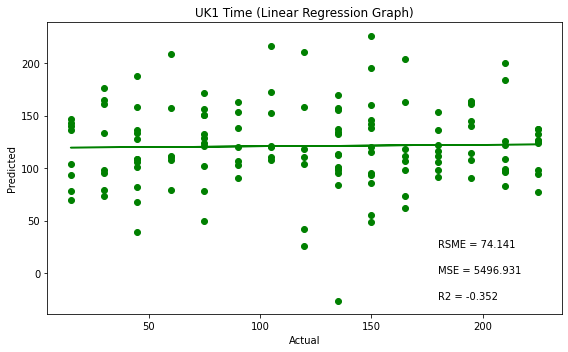

In [ ]:
#Simple regression graph including respective points 
fig40, ax40 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax40.scatter(arr1, lin_pred1, color='green')
ax40.plot(arr1, LinearRegression().fit(arr1, lin_pred1).predict(arr1), color='green')
#ax1.plot(test_metalabels1, LinearRegression().fit(test_metalabels1, lin_pred).predict(test_metalabels1), color='green')
ax40.set_title('UK1 Time (Linear Regression Graph)')
ax40.set_xlabel('Actual')
ax40.set_ylabel('Predicted')
#ax1.set_xlim(-10, 2000)
#ax1.set_ylim(-10, 2000)

#Annotating accuracy scores for specific label in specific habitat
ax40.annotate("R2 = {:.3f}".format(r2_score(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average')), (180, -25))
ax40.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (180, 0))
ax40.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (180, 25))

fig40.tight_layout()
plt.show()

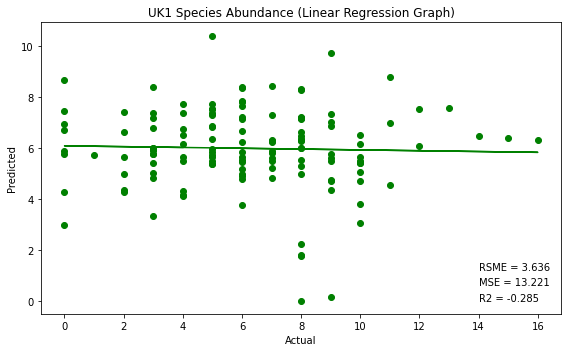

In [ ]:
#Similarly done for species abundance graph
fig41, ax41 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax41.scatter(arr2, lin_pred2, color='green')
ax41.plot(arr2, LinearRegression().fit(arr2, lin_pred2).predict(arr2), color='green')
ax41.set_title('UK1 Species Abundance (Linear Regression Graph)')
ax41.set_xlabel('Actual')
ax41.set_ylabel('Predicted')
#ax2.set_xlim(-10, 50)
#ax2.set_ylim(-10, 50)

ax41.annotate("R2 = {:.3f}".format(r2_score(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average')), (14, 0))
ax41.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (14, 0.6))
ax41.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (14, 1.2))

fig41.tight_layout()
plt.show()

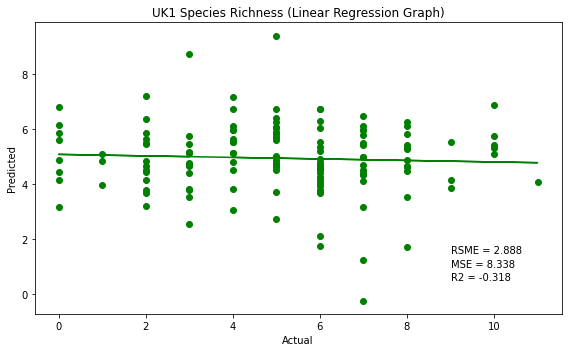

In [ ]:
#repeated for species richness graph 
fig42, ax42 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax42.scatter(arr3, lin_pred3, color='green')
ax42.plot(arr3, LinearRegression().fit(arr3, lin_pred3).predict(arr3), color='green')
ax42.set_title('UK1 Species Richness (Linear Regression Graph)')
ax42.set_xlabel('Actual')
ax42.set_ylabel('Predicted')
#ax3.set_xlim(-10, 50)
#ax3.set_ylim(-10, 50)

ax42.annotate("R2 = {:.3f}".format(r2_score(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average')), (9, 0.5))
ax42.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=True)),(9, 1))
ax42.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (9, 1.5))

fig42.tight_layout()
plt.show()

#### LinearRegression UK2

In [ ]:
#Linear Regression as this is not a classification problem but a regression problem 
from sklearn.linear_model import LinearRegression
UK2_lin_classifier = LinearRegression()
# Fit it to the data
UK2_lin_classifier.fit(UK2_train_metadata,UK2_train_metalabels)
#prediction and accuracy score
import sklearn.metrics as metrics
UK2_lin_pred = UK2_lin_classifier.predict(UK2_test_metadata)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK2_test_metalabels, UK2_lin_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Main Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK2_test_metalabels, UK2_lin_pred, sample_weight=None, multioutput='uniform_average', squared=False))
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(UK2_test_metalabels, UK2_lin_pred, sample_weight=None, multioutput='uniform_average'))

2070.2615381949777
28.6836616639002
-0.4932614331807057


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(UK2_test_metalabels.shape[0]):
  arr1.append(UK2_test_metalabels[i][0])
  arr2.append(UK2_test_metalabels[i][1])
  arr3.append(UK2_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

lin_pred1 = []
lin_pred2 = []
lin_pred3 = []
for i in range(UK2_lin_pred.shape[0]):
  lin_pred1.append(UK2_lin_pred[i][0])
  lin_pred2.append(UK2_lin_pred[i][1])
  lin_pred3.append(UK2_lin_pred[i][2])

print(lin_pred1)
print(lin_pred2)
print(lin_pred3)

[120, 210, 105, 150, 30, 30, 75, 90, 225, 75, 75, 210, 15, 225, 210, 165, 165, 105, 60, 60, 210, 165, 150, 195, 180, 195, 75, 60, 90, 105, 15, 105, 75, 180, 90, 120, 30, 210, 60, 60, 135, 75, 165, 105, 195, 210, 60, 180, 150, 75, 165, 180, 225, 195, 30, 195, 180, 180, 45, 120, 195, 135, 195, 150, 225, 225, 210, 225, 30, 135, 135, 120, 210, 30, 165, 60, 210, 135, 225, 15, 105, 105, 45, 45, 105, 75, 45, 60, 195, 150, 150, 210, 30, 105, 195, 210, 195, 105, 30, 105, 195, 45, 210, 15, 30, 15, 30, 30, 90, 210, 75, 90, 45, 75, 120, 45, 180, 120, 30, 180, 45, 195, 150, 120, 75, 165, 210, 195, 150, 180, 135, 225, 135, 135, 180]
[12, 5, 7, 8, 3, 2, 15, 13, 7, 10, 7, 6, 3, 7, 12, 6, 8, 5, 12, 7, 5, 6, 7, 9, 8, 9, 12, 14, 15, 9, 2, 10, 10, 9, 9, 11, 3, 11, 14, 10, 8, 7, 7, 9, 10, 6, 7, 10, 9, 8, 8, 10, 10, 10, 2, 8, 9, 12, 2, 9, 8, 7, 8, 11, 5, 6, 10, 7, 2, 8, 14, 9, 10, 2, 7, 5, 7, 9, 10, 0, 7, 12, 6, 3, 6, 9, 10, 8, 8, 4, 9, 11, 0, 12, 7, 7, 7, 11, 2, 7, 7, 13, 6, 2, 0, 1, 2, 2, 11, 7, 12, 11, 0

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
lin_pred1 = np.array(lin_pred1)
lin_pred2 = np.array(lin_pred2)
lin_pred3 = np.array(lin_pred3)

In [ ]:
lin_pred1.shape
arr1.shape

In [ ]:
arr1, lin_pred1 = arr1.reshape(-1,1), lin_pred1.reshape(-1,1)
arr2, lin_pred2 = arr2.reshape(-1,1), lin_pred2.reshape(-1,1)
arr3, lin_pred3 = arr3.reshape(-1,1), lin_pred3.reshape(-1,1)

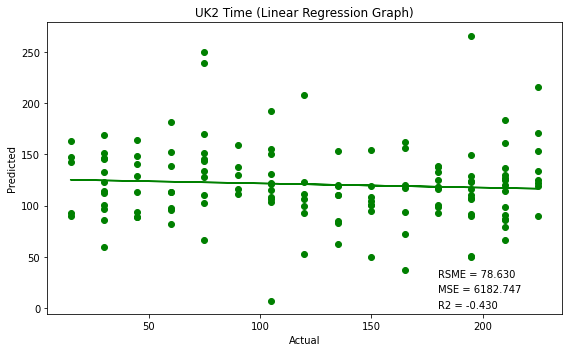

In [ ]:
fig43, ax43 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax43.scatter(arr1, lin_pred1, color='green')
ax43.plot(arr1, LinearRegression().fit(arr1, lin_pred1).predict(arr1), color='green')
ax43.set_title('UK2 Time (Linear Regression Graph)')
ax43.set_xlabel('Actual')
ax43.set_ylabel('Predicted')

ax43.annotate("R2 = {:.3f}".format(r2_score(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average')), (180, 0))
ax43.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (180, 15))
ax43.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (180, 30))

fig43.tight_layout()
plt.show()

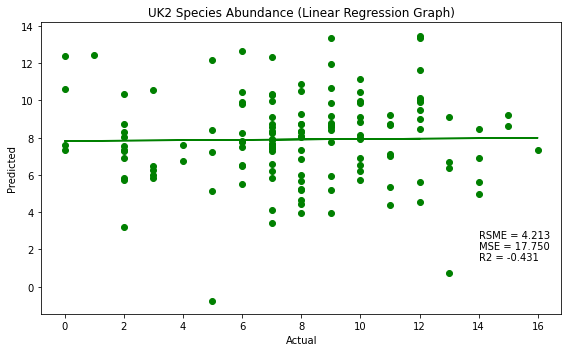

In [ ]:
fig44, ax44 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax44.scatter(arr2, lin_pred2, color='green')
ax44.plot(arr2, LinearRegression().fit(arr2, lin_pred2).predict(arr2), color='green')
ax44.set_title('UK2 Species Abundance (Linear Regression Graph)')
ax44.set_xlabel('Actual')
ax44.set_ylabel('Predicted')

ax44.annotate("R2 = {:.3f}".format(r2_score(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average')), (14, 1.4))
ax44.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (14, 2.0))
ax44.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (14, 2.6))

fig44.tight_layout()
plt.show()

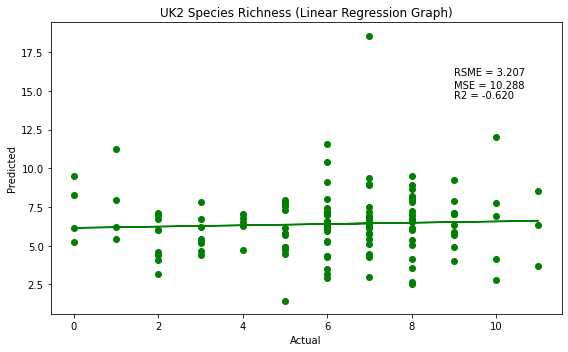

In [ ]:
fig45, ax45 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax45.scatter(arr3, lin_pred3, color='green')
ax45.plot(arr3, LinearRegression().fit(arr3, lin_pred3).predict(arr3), color='green')
ax45.set_title('UK2 Species Richness (Linear Regression Graph)')
ax45.set_xlabel('Actual')
ax45.set_ylabel('Predicted')

ax45.annotate("R2 = {:.3f}".format(r2_score(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average')), (9, 14.5))
ax45.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (9, 15.2))
ax45.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (9, 16))

fig45.tight_layout()
plt.show()

#### LinearRegression UK3

In [ ]:
#Linear Regression as this is not a classification problem but a regression problem 
from sklearn.linear_model import LinearRegression
UK3_lin_classifier = LinearRegression()
# Fit it to the data
UK3_lin_classifier.fit(UK3_train_metadata,UK3_train_metalabels)
#prediction and accuracy score
import sklearn.metrics as metrics
UK3_lin_pred = UK3_lin_classifier.predict(UK3_test_metadata)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK3_test_metalabels, UK3_lin_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Main Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK3_test_metalabels, UK3_lin_pred, sample_weight=None, multioutput='uniform_average', squared=False))
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(UK3_test_metalabels, UK3_lin_pred, sample_weight=None, multioutput='uniform_average'))

1742.7549629159173
25.87997196046659
-0.3514563263522575


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(UK3_test_metalabels.shape[0]):
  arr1.append(UK3_test_metalabels[i][0])
  arr2.append(UK3_test_metalabels[i][1])
  arr3.append(UK3_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

lin_pred1 = []
lin_pred2 = []
lin_pred3 = []
for i in range(UK3_lin_pred.shape[0]):
  lin_pred1.append(UK3_lin_pred[i][0])
  lin_pred2.append(UK3_lin_pred[i][1])
  lin_pred3.append(UK3_lin_pred[i][2])

print(lin_pred1)
print(lin_pred2)
print(lin_pred3)

[15, 15, 105, 225, 180, 225, 15, 165, 195, 105, 105, 165, 225, 165, 150, 210, 180, 180, 225, 225, 165, 195, 120, 60, 60, 150, 30, 210, 120, 75, 210, 60, 165, 195, 135, 75, 45, 150, 105, 210, 105, 15, 195, 120, 150, 15, 120, 225, 75, 165, 165, 90, 165, 210, 180, 90, 60, 180, 120, 210, 75, 30, 225, 195, 75, 165, 225, 180, 165, 135, 120, 105, 180, 75, 120, 165, 75, 30, 30, 120, 195, 195, 45, 90, 105, 165, 120, 90, 45, 150, 135, 135, 210, 15, 195, 195, 75, 60, 60, 150, 195, 90, 15, 90, 90, 180, 45, 135, 30, 150, 210, 15, 150, 15, 165, 15, 75, 210, 105, 30, 60, 180, 135, 45, 210, 165, 225, 60, 30, 105, 75, 180, 45, 225, 105]
[0, 1, 5, 0, 1, 3, 5, 5, 0, 5, 8, 4, 3, 3, 1, 8, 4, 7, 3, 2, 5, 8, 1, 3, 5, 0, 1, 2, 0, 2, 2, 5, 4, 3, 5, 3, 1, 5, 1, 3, 10, 1, 2, 3, 7, 0, 2, 2, 4, 7, 3, 5, 2, 0, 4, 3, 1, 2, 1, 2, 1, 2, 0, 2, 3, 3, 9, 3, 5, 0, 2, 2, 4, 5, 8, 5, 4, 1, 0, 9, 2, 7, 0, 6, 8, 8, 5, 0, 2, 8, 7, 1, 4, 0, 3, 2, 7, 2, 2, 4, 3, 0, 2, 5, 2, 7, 0, 2, 1, 4, 3, 0, 6, 1, 2, 0, 5, 6, 2, 0, 5, 7, 5, 0

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
lin_pred1 = np.array(lin_pred1)
lin_pred2 = np.array(lin_pred2)
lin_pred3 = np.array(lin_pred3)

In [ ]:
lin_pred1.shape
arr1.shape

In [ ]:
arr1, lin_pred1 = arr1.reshape(-1,1), lin_pred1.reshape(-1,1)
arr2, lin_pred2 = arr2.reshape(-1,1), lin_pred2.reshape(-1,1)
arr3, lin_pred3 = arr3.reshape(-1,1), lin_pred3.reshape(-1,1)

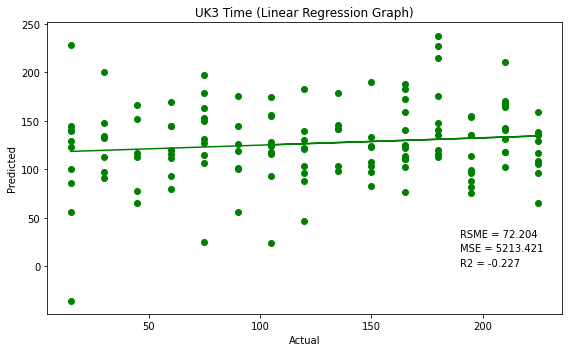

In [ ]:
fig46, ax46 = plt.subplots(1,1 ,figsize=(8,5))

ax46.scatter(arr1, lin_pred1, color='green')
ax46.plot(arr1, LinearRegression().fit(arr1, lin_pred1).predict(arr1), color='green')
ax46.set_title('UK3 Time (Linear Regression Graph)')
ax46.set_xlabel('Actual')
ax46.set_ylabel('Predicted')


ax46.annotate("R2 = {:.3f}".format(r2_score(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average')), (190, 0))
ax46.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (190, 15))
ax46.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (190, 30))

fig46.tight_layout()
plt.show()

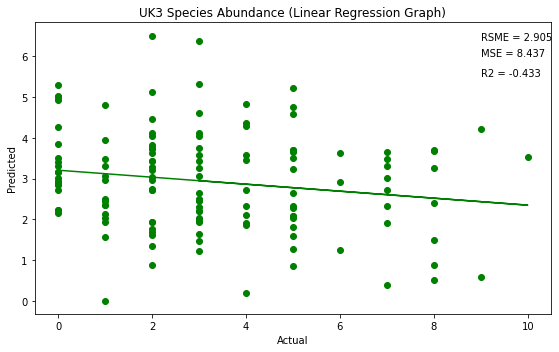

In [ ]:
fig47, ax47 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax47.scatter(arr2, lin_pred2, color='green')
ax47.plot(arr2, LinearRegression().fit(arr2, lin_pred2).predict(arr2), color='green')
ax47.set_title('UK3 Species Abundance (Linear Regression Graph)')
ax47.set_xlabel('Actual')
ax47.set_ylabel('Predicted')

ax47.annotate("R2 = {:.3f}".format(r2_score(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average')), (9, 5.5))
ax47.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (9, 6))
ax47.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (9, 6.4))

fig47.tight_layout()
plt.show()

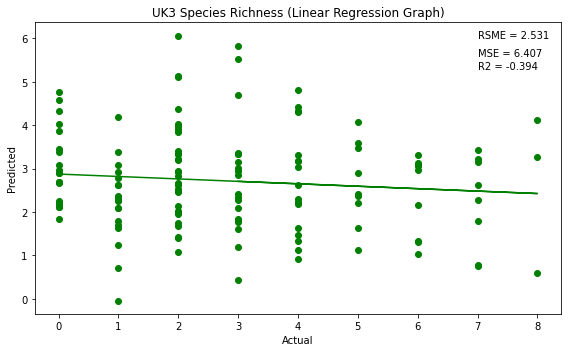

In [ ]:
fig48, ax48 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax48.scatter(arr3, lin_pred3, color='green')
ax48.plot(arr3, LinearRegression().fit(arr3, lin_pred3).predict(arr3), color='green')
ax48.set_title('UK3 Species Richness (Linear Regression Graph)')
ax48.set_xlabel('Actual')
ax48.set_ylabel('Predicted')

ax48.annotate("R2 = {:.3f}".format(r2_score(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average')), (7, 5.3))
ax48.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (7, 5.6))
ax48.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (7, 6))

fig48.tight_layout()
plt.show()

#### LinearRegression EC1

In [ ]:
#Linear Regression as this is not a classification problem but a regression problem 
from sklearn.linear_model import LinearRegression
EC1_lin_classifier = LinearRegression()
# Fit it to the data
EC1_lin_classifier.fit(EC1_train_metadata,EC1_train_metalabels)
#prediction and accuracy score
import sklearn.metrics as metrics
EC1_lin_pred = EC1_lin_classifier.predict(EC1_test_metadata)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC1_test_metalabels, EC1_lin_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Main Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC1_test_metalabels, EC1_lin_pred, sample_weight=None, multioutput='uniform_average', squared=False))
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(EC1_test_metalabels, EC1_lin_pred, sample_weight=None, multioutput='uniform_average'))

53484.47365958194
135.164848948299
-0.29113039668179286


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(EC1_test_metalabels.shape[0]):
  arr1.append(EC1_test_metalabels[i][0])
  arr2.append(EC1_test_metalabels[i][1])
  arr3.append(EC1_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

lin_pred1 = []
lin_pred2 = []
lin_pred3 = []
for i in range(EC1_lin_pred.shape[0]):
  lin_pred1.append(EC1_lin_pred[i][0])
  lin_pred2.append(EC1_lin_pred[i][1])
  lin_pred3.append(EC1_lin_pred[i][2])

print(lin_pred1)
print(lin_pred2)
print(lin_pred3)

[747, 752, 772, 787, 2, 12, 22, 762, 27, 762, 762, 747, 752, 7, -13, 37, 737, 762, 757, 762, 22, 767, 37, 737, 752, 762, 22, 27, 32, 2, 2, 722, 12, 772, 32, 747, 737, 742, 52, 32, 722, 7, 722, 752, 52, 767, 737, 787, 762, 17, 2, 2, -13, 12, 722, 7, 7, 52, -13, 772, 2, 7, 752, 762, 7, 752, 17, 52, 37, 12, 12, 27, 787, 7, 32, 52, 772, 767, 787, 17, 742, 742, 12, 772, 772, 52, 2, 762, 32, 737, 22, 722, 757, 737, 722, 772, 2, 747, 7, 787, 787, 7, 27, 772, 767, 52, 52, 747, 787, 22, 7, 747, 742, 752, 772, 767, 757, 52, 2, 767, 757, 787, 7, 752, 17, 7, 22, 752, 17, 2, -13, 772, 52, 742, -13, 787, 752, 722, 12, 7, 32, 27, 737, 2, 17, 757, 17, 17, 2, 752, -13, -13, 12, 2, 52, 32, 767, 12, 737, 12, 37, -13, 37, 722, 752, 742, 787, 787, 752, -13, 17, 22, 52, 52, 737, 32, 742, 7, 757, 767]
[1, 1, 0, 0, 3, 9, 5, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 4, 6, 2, 4, 3, 3, 0, 3, 1, 0, 0, 6, 0, 5, 5, 4, 0, 0, 0, 4, 0, 0, 0, 5, 5, 3, 2, 0, 5, 8, 0, 1, 0, 5, 5, 0, 0, 4, 0, 3, 3, 5, 6,

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
lin_pred1 = np.array(lin_pred1)
lin_pred2 = np.array(lin_pred2)
lin_pred3 = np.array(lin_pred3)

In [ ]:
lin_pred1.shape
arr1.shape

(180,)

In [ ]:
arr1, lin_pred1 = arr1.reshape(-1,1), lin_pred1.reshape(-1,1)
arr2, lin_pred2 = arr2.reshape(-1,1), lin_pred2.reshape(-1,1)
arr3, lin_pred3 = arr3.reshape(-1,1), lin_pred3.reshape(-1,1)

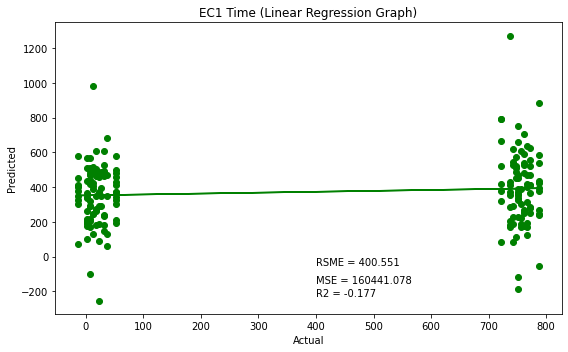

In [ ]:
fig49, ax49 = plt.subplots(1,1 ,figsize=(8,5))

ax49.scatter(arr1, lin_pred1, color='green')
ax49.plot(arr1, LinearRegression().fit(arr1, lin_pred1).predict(arr1), color='green')
ax49.set_title('EC1 Time (Linear Regression Graph)')
ax49.set_xlabel('Actual')
ax49.set_ylabel('Predicted')

ax49.annotate("R2 = {:.3f}".format(r2_score(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average')), (400, -225))
ax49.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (400, -150))
ax49.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (400, -50))

fig49.tight_layout()
plt.show()

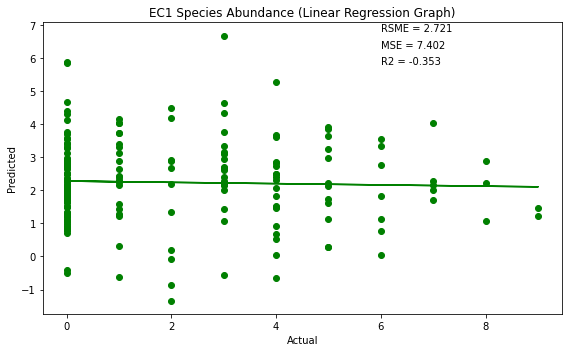

In [ ]:
fig50, ax50 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax50.scatter(arr2, lin_pred2, color='green')
ax50.plot(arr2, LinearRegression().fit(arr2, lin_pred2).predict(arr2), color='green')
ax50.set_title('EC1 Species Abundance (Linear Regression Graph)')
ax50.set_xlabel('Actual')
ax50.set_ylabel('Predicted')

ax50.annotate("R2 = {:.3f}".format(r2_score(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average')), (6, 5.8))
ax50.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (6, 6.3))
ax50.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (6, 6.8))

fig50.tight_layout()
plt.show()

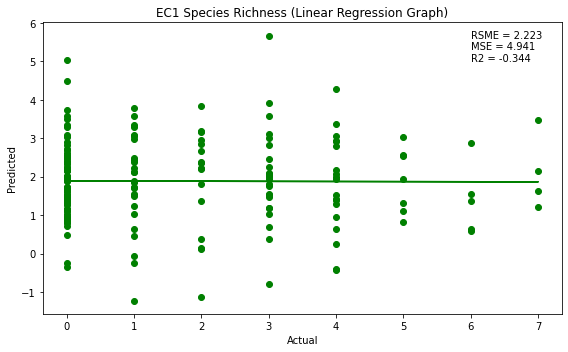

In [ ]:
fig51, ax51 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax51.scatter(arr3, lin_pred3, color='green')
ax51.plot(arr3, LinearRegression().fit(arr3, lin_pred3).predict(arr3), color='green')
ax51.set_title('EC1 Species Richness (Linear Regression Graph)')
ax51.set_xlabel('Actual')
ax51.set_ylabel('Predicted')

ax51.annotate("R2 = {:.3f}".format(r2_score(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average')), (6, 5))
ax51.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (6, 5.3))
ax51.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (6, 5.6))

fig51.tight_layout()
plt.show()

#### LinearRegression EC2

In [ ]:
#Linear Regression as this is not a classification problem but a regression problem 
from sklearn.linear_model import LinearRegression
EC2_lin_classifier = LinearRegression()
# Fit it to the data
EC2_lin_classifier.fit(EC2_train_metadata,EC2_train_metalabels)
#prediction and accuracy score
import sklearn.metrics as metrics
EC2_lin_pred = EC2_lin_classifier.predict(EC2_test_metadata)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC2_test_metalabels, EC2_lin_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Main Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC2_test_metalabels, EC2_lin_pred, sample_weight=None, multioutput='uniform_average', squared=False))
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(EC2_test_metalabels, EC2_lin_pred, sample_weight=None, multioutput='uniform_average'))

57374.929908650374
140.40985277155045
-0.2780444119131369


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(EC2_test_metalabels.shape[0]):
  arr1.append(EC2_test_metalabels[i][0])
  arr2.append(EC2_test_metalabels[i][1])
  arr3.append(EC2_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

lin_pred1 = []
lin_pred2 = []
lin_pred3 = []
for i in range(EC2_lin_pred.shape[0]):
  lin_pred1.append(EC2_lin_pred[i][0])
  lin_pred2.append(EC2_lin_pred[i][1])
  lin_pred3.append(EC2_lin_pred[i][2])

print(lin_pred1)
print(lin_pred2)
print(lin_pred3)

[32, 737, 22, 747, 757, 22, 722, 17, 2, 17, 762, 37, 767, 2, 37, 742, 7, 787, 2, 12, 787, 787, 747, 742, 2, 2, 22, 2, 767, 757, 767, 752, 747, 32, 767, 12, 17, 767, 722, 722, 52, 722, 22, 37, 752, 762, 17, 752, 12, 722, 772, -13, 752, 737, 52, 787, 37, 32, 2, 22, 17, 767, 37, 752, 12, 772, 767, -13, -13, 752, 772, 37, 52, 37, 37, 787, 32, 747, 27, 787, 747, 52, 32, 787, 37, 17, 17, 722, 22, 742, 52, 737, 772, 12, 2, 752, 52, 772, 37, 17, 742, 752, 37, 747, 722, 787, 7, 752, 2, 767, 757, 742, 2, 757, 32, -13, 757, 742, 742, 52, 747, 52, 737, -13, 787, 767, 742, 772, -13, 27, 12, 767, 12, -13, 742, 742, 22, 22, 52, 27, 742, 747, 52, 787, 787, 752, 7, 32, 17, -13, 7, 32, 32, 17, 752, 22, 27, 52, 787, 757, 32, 747, 2, 7, 742, 32, 762, 757, 722, 22, 762, 787, 742, 7, 22, 772, 2, 32, 757, 787]
[4, 1, 3, 0, 0, 5, 2, 12, 7, 4, 0, 2, 0, 7, 5, 1, 3, 0, 4, 10, 0, 0, 1, 1, 3, 6, 11, 1, 0, 0, 0, 0, 0, 3, 0, 2, 7, 0, 0, 1, 4, 1, 8, 8, 1, 0, 4, 0, 4, 1, 0, 3, 1, 2, 6, 0, 5, 0, 6, 3, 4, 0, 6, 1, 5, 0,

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
lin_pred1 = np.array(lin_pred1)
lin_pred2 = np.array(lin_pred2)
lin_pred3 = np.array(lin_pred3)

In [ ]:
lin_pred1.shape
arr1.shape

In [ ]:
arr1, lin_pred1 = arr1.reshape(-1,1), lin_pred1.reshape(-1,1)
arr2, lin_pred2 = arr2.reshape(-1,1), lin_pred2.reshape(-1,1)
arr3, lin_pred3 = arr3.reshape(-1,1), lin_pred3.reshape(-1,1)

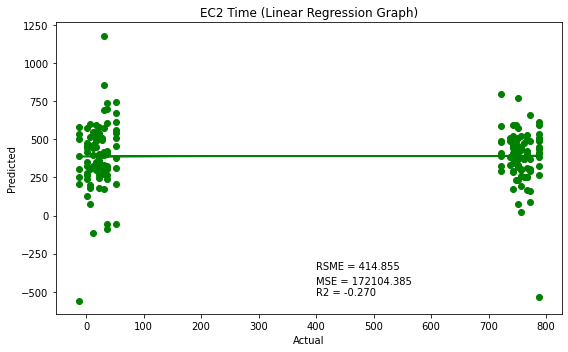

In [ ]:
fig52, ax52 = plt.subplots(1,1 ,figsize=(8,5))

ax52.scatter(arr1, lin_pred1, color='green')
ax52.plot(arr1, LinearRegression().fit(arr1, lin_pred1).predict(arr1), color='green')
ax52.set_title('EC2 Time (Linear Regression Graph)')
ax52.set_xlabel('Actual')
ax52.set_ylabel('Predicted')

ax52.annotate("R2 = {:.3f}".format(r2_score(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average')), (400, -525))
ax52.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (400, -450))
ax52.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (400, -350))

fig52.tight_layout()
plt.show()

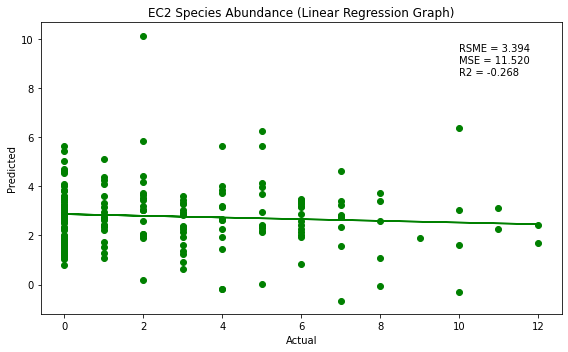

In [ ]:
fig53, ax53 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax53.scatter(arr2, lin_pred2, color='green')
ax53.plot(arr2, LinearRegression().fit(arr2, lin_pred2).predict(arr2), color='green')
ax53.set_title('EC2 Species Abundance (Linear Regression Graph)')
ax53.set_xlabel('Actual')
ax53.set_ylabel('Predicted')

ax53.annotate("R2 = {:.3f}".format(r2_score(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average')), (10, 8.5))
ax53.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (10, 9))
ax53.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 9.5))

fig53.tight_layout()
plt.show()

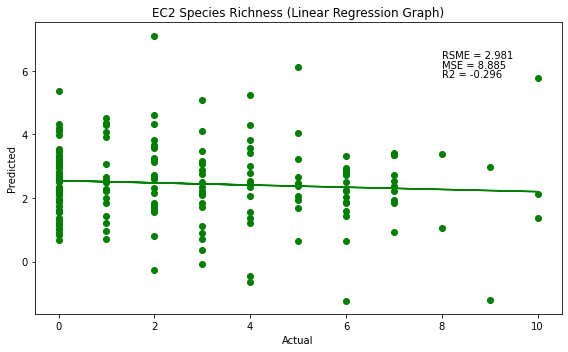

In [ ]:
fig54, ax54 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax54.scatter(arr3, lin_pred3, color='green')
ax54.plot(arr3, LinearRegression().fit(arr3, lin_pred3).predict(arr3), color='green')
ax54.set_title('EC2 Species Richness (Linear Regression Graph)')
ax54.set_xlabel('Actual')
ax54.set_ylabel('Predicted')

ax54.annotate("R2 = {:.3f}".format(r2_score(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average')), (8, 5.8))
ax54.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (8, 6.1))
ax54.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (8, 6.4))

fig54.tight_layout()
plt.show()

#### LinearRegression EC3

In [ ]:
#Linear Regression as this is not a classification problem but a regression problem 
from sklearn.linear_model import LinearRegression
EC3_lin_classifier = LinearRegression()
# Fit it to the data
EC3_lin_classifier.fit(EC3_train_metadata,EC3_train_metalabels)
#prediction and accuracy score
import sklearn.metrics as metrics
EC3_lin_pred = EC3_lin_classifier.predict(EC3_test_metadata)

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC3_test_metalabels, EC3_lin_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Main Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC3_test_metalabels, EC3_lin_pred, sample_weight=None, multioutput='uniform_average', squared=False))
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(EC3_test_metalabels, EC3_lin_pred, sample_weight=None, multioutput='uniform_average'))

56531.009498246414
139.352246764289
-0.25051538656852235


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(EC3_test_metalabels.shape[0]):
  arr1.append(EC3_test_metalabels[i][0])
  arr2.append(EC3_test_metalabels[i][1])
  arr3.append(EC3_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

lin_pred1 = []
lin_pred2 = []
lin_pred3 = []
for i in range(EC3_lin_pred.shape[0]):
  lin_pred1.append(EC3_lin_pred[i][0])
  lin_pred2.append(EC3_lin_pred[i][1])
  lin_pred3.append(EC3_lin_pred[i][2])

print(lin_pred1)
print(lin_pred2)
print(lin_pred3)

[767, 2, 12, 52, 17, 37, 752, -13, 757, 7, 762, 772, 747, 737, 37, 52, 742, 772, 787, 747, 2, 12, 757, 747, 7, 742, 22, 7, 752, 752, 2, 787, 52, 752, 772, 2, 772, 32, 737, 37, 2, 742, 2, 7, 17, 22, 17, 787, 772, 767, 742, 32, 742, 762, 722, 762, 2, 747, 37, 7, 742, 737, 772, 12, 12, 17, -13, 787, 762, -13, 722, 787, 32, 742, 772, 742, 762, 17, 52, 32, 757, 32, 22, 27, 747, 762, 7, 752, 7, 737, 7, 32, 32, -13, 17, 772, 737, 32, 52, 762, 12, 12, 52, 37, 7, 772, 2, 27, 772, 772, 742, 767, 762, 722, 17, 747, 767, 787, 27, 767, 22, 27, 787, 747, 772, 7, 12, 767, 767, 737, 12, 27, 32, 752, 52, 32, 22, 787, 752, 767, 2, 22, 752, 2, 787, 722, 757, 772, 2, 7, 12, 37, 2, 32, 52, 787, 27, 757, 12, 52, 7, 12, 742, 17, 762, 2, 757, 762, 772, 52, 2, 747, 17, -13, 737, 52, 767, 767, 17, 787]
[0, 8, 9, 7, 5, 5, 0, 4, 0, 4, 0, 0, 0, 0, 2, 6, 3, 1, 0, 0, 5, 10, 0, 0, 3, 3, 5, 8, 1, 0, 7, 0, 7, 1, 0, 4, 2, 1, 0, 0, 2, 3, 5, 12, 7, 8, 5, 0, 2, 0, 6, 8, 0, 0, 3, 0, 9, 0, 7, 6, 0, 0, 0, 6, 6, 2, 7, 0, 0, 4,

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
lin_pred1 = np.array(lin_pred1)
lin_pred2 = np.array(lin_pred2)
lin_pred3 = np.array(lin_pred3)

In [ ]:
lin_pred1.shape
arr1.shape

(945,)

In [ ]:
arr1, lin_pred1 = arr1.reshape(-1,1), lin_pred1.reshape(-1,1)
arr2, lin_pred2 = arr2.reshape(-1,1), lin_pred2.reshape(-1,1)
arr3, lin_pred3 = arr3.reshape(-1,1), lin_pred3.reshape(-1,1)

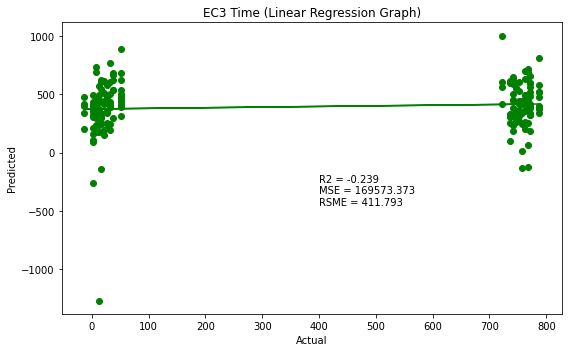

In [ ]:
fig55, ax55 = plt.subplots(1,1 ,figsize=(8,5))

ax55.scatter(arr1, lin_pred1, color='green')
ax55.plot(arr1, LinearRegression().fit(arr1, lin_pred1).predict(arr1), color='green')
ax55.set_title('EC3 Time (Linear Regression Graph)')
ax55.set_xlabel('Actual')
ax55.set_ylabel('Predicted')

ax55.annotate("R2 = {:.3f}".format(r2_score(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average')), (400, -250))
ax55.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (400, -350))
ax55.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, lin_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (400, -450))

fig55.tight_layout()
plt.show()

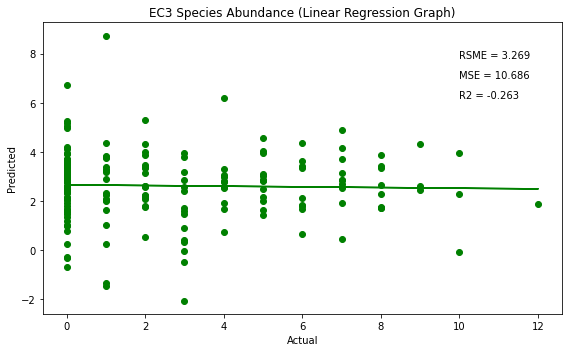

In [ ]:
fig56, ax56 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax56.scatter(arr2, lin_pred2, color='green')
ax56.plot(arr2, LinearRegression().fit(arr2, lin_pred2).predict(arr2), color='green')
ax56.set_title('EC3 Species Abundance (Linear Regression Graph)')
ax56.set_xlabel('Actual')
ax56.set_ylabel('Predicted')

ax56.annotate("R2 = {:.3f}".format(r2_score(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average')), (10, 6.2))
ax56.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (10, 7))
ax56.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, lin_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 7.8))

fig56.tight_layout()
plt.show()

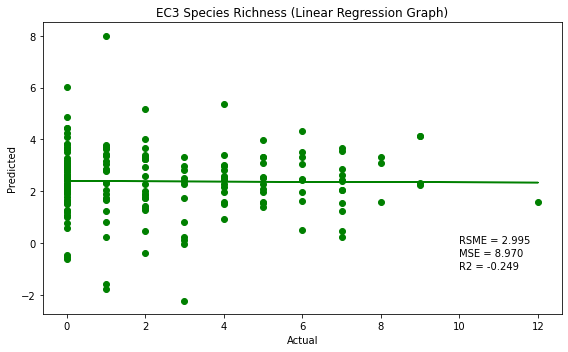

In [ ]:
fig57, ax57 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax57.scatter(arr3, lin_pred3, color='green')
ax57.plot(arr3, LinearRegression().fit(arr3, lin_pred3).predict(arr3), color='green')
ax57.set_title('EC3 Species Richness (Linear Regression Graph)')
ax57.set_xlabel('Actual')
ax57.set_ylabel('Predicted')

ax57.annotate("R2 = {:.3f}".format(r2_score(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average')), (10, -1))
ax57.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (10, -0.5))
ax57.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, lin_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 0))

fig57.tight_layout()
plt.show()

### Random Forest Regressor

#### ForestRegression UK1

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
UK1_meta_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2)
UK1_meta_reg.fit(UK1_train_metadata,UK1_train_metalabels)

#prediction and accuracy score
import sklearn.metrics as metrics
UK1_rand_pred = UK1_meta_reg.predict(UK1_test_metadata)


In [ ]:
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(UK1_test_metalabels,UK1_rand_pred,sample_weight=None, multioutput='uniform_average'))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK1_test_metalabels, UK1_rand_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK1_test_metalabels, UK1_rand_pred, sample_weight=None, multioutput='uniform_average', squared=False))

-0.09498121888441435
1524.4186475171462
24.482367329917462


In [ ]:
#Creating lists of values to store and split different labels - allows graphs to later
#show labels independent of each other - also done for rand_prediction value
#Repeated for all other habitats 
arr1 = []
arr2 = []
arr3 = []
for i in range(UK1_test_metalabels.shape[0]):
  arr1.append(UK1_test_metalabels[i][0])
  arr2.append(UK1_test_metalabels[i][1])
  arr3.append(UK1_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

rand_pred1 = []
rand_pred2 = []
rand_pred3 = []
for i in range(UK1_rand_pred.shape[0]):
  rand_pred1.append(UK1_rand_pred[i][0])
  rand_pred2.append(UK1_rand_pred[i][1])
  rand_pred3.append(UK1_rand_pred[i][2])

print(rand_pred1)
print(rand_pred2)
print(rand_pred3)

[180, 150, 90, 210, 135, 120, 90, 180, 150, 75, 150, 75, 105, 195, 120, 225, 15, 180, 30, 75, 135, 120, 30, 45, 30, 15, 120, 135, 15, 45, 15, 150, 135, 180, 210, 60, 60, 30, 75, 15, 75, 165, 60, 105, 105, 150, 75, 180, 150, 15, 45, 195, 90, 135, 150, 135, 120, 90, 45, 180, 75, 165, 210, 75, 135, 225, 135, 60, 195, 150, 165, 45, 75, 105, 210, 90, 30, 225, 120, 225, 210, 165, 135, 60, 225, 180, 225, 45, 135, 150, 195, 135, 150, 30, 195, 135, 45, 150, 135, 15, 225, 210, 120, 225, 15, 150, 210, 90, 180, 75, 150, 45, 165, 165, 195, 165, 45, 105, 105, 90, 195, 75, 210, 30, 225, 105, 60, 135, 165, 210, 45, 45, 30, 195, 45]
[5, 13, 5, 5, 8, 7, 9, 7, 8, 6, 6, 8, 12, 10, 7, 8, 0, 8, 3, 7, 3, 9, 2, 3, 0, 0, 6, 6, 3, 2, 3, 8, 8, 8, 8, 9, 4, 2, 10, 1, 10, 8, 9, 9, 10, 6, 6, 6, 6, 0, 3, 8, 7, 5, 8, 9, 11, 10, 7, 3, 9, 10, 6, 15, 5, 5, 6, 6, 4, 4, 7, 4, 3, 12, 3, 3, 0, 6, 8, 5, 5, 8, 5, 4, 5, 6, 5, 6, 9, 3, 6, 8, 3, 2, 8, 5, 5, 10, 9, 0, 0, 8, 10, 7, 2, 4, 10, 8, 9, 6, 4, 5, 7, 11, 3, 7, 3, 6, 16, 14

In [ ]:
#Identical steps to linear regression - only regressor has changed now
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
rand_pred1 = np.array(rand_pred1)
rand_pred2 = np.array(rand_pred2)
rand_pred3 = np.array(rand_pred3)

In [ ]:
#reshaping as with the linear regression model
arr1, rand_pred1 = arr1.reshape(-1,1), rand_pred1.reshape(-1,1)
arr2, rand_pred2 = arr2.reshape(-1,1), rand_pred2.reshape(-1,1)
arr3, rand_pred3 = arr3.reshape(-1,1), rand_pred3.reshape(-1,1)

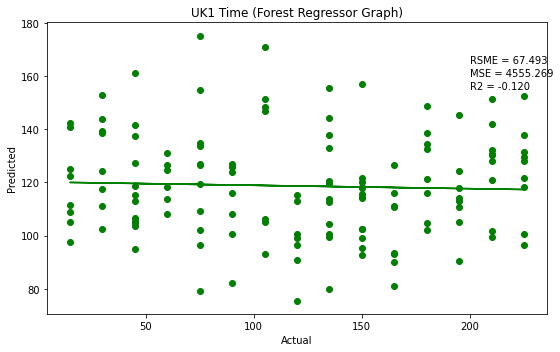

In [ ]:
#plotting results based on regressor, while also adding a linear regression line
#to see how well the model data fits to the data -- repeated for all following 
#graphs in each respective habitat
from matplotlib.pyplot import figure
fig20, ax20 = plt.subplots(1,1 ,figsize=(8,5),  constrained_layout=False)

ax20.scatter(arr1, rand_pred1, color='green')
ax20.plot(arr1, LinearRegression().fit(arr1, rand_pred1).predict(arr1), color='green')
ax20.set_title('UK1 Time (Forest Regressor Graph)')
ax20.set_xlabel('Actual')
ax20.set_ylabel('Predicted')

ax20.annotate("R2 = {:.3f}".format(r2_score(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average')), (200, 155))
ax20.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (200, 160))
ax20.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (200, 165))

fig20.tight_layout()
plt.show()

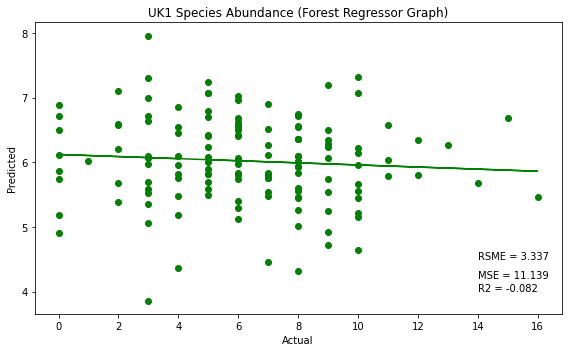

In [ ]:
fig21, ax21 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax21.scatter(arr2, rand_pred2, color='green')
ax21.plot(arr2, LinearRegression().fit(arr2, rand_pred2).predict(arr2), color='green')
ax21.set_title('UK1 Species Abundance (Forest Regressor Graph)')
ax21.set_xlabel('Actual')
ax21.set_ylabel('Predicted')

ax21.annotate("R2 = {:.3f}".format(r2_score(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average')), (14, 4))
ax21.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (14, 4.2))
ax21.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (14, 4.5))

fig21.tight_layout()
plt.show()

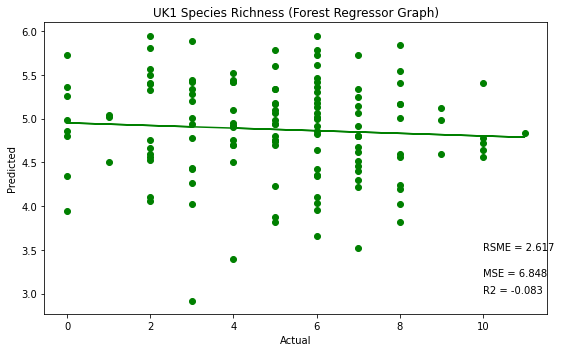

In [ ]:
fig22, ax22 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax22.scatter(arr3, rand_pred3, color='green')
ax22.plot(arr3, LinearRegression().fit(arr3, rand_pred3).predict(arr3), color='green')
ax22.set_title('UK1 Species Richness (Forest Regressor Graph)')
ax22.set_xlabel('Actual')
ax22.set_ylabel('Predicted')

ax22.annotate("R2 = {:.3f}".format(r2_score(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average')), (10, 3))
ax22.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (10, 3.2))
ax22.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 3.5))

fig22.tight_layout()
plt.show()

#### ForestRegression UK2

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
UK2_meta_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2)
UK2_meta_reg.fit(UK2_train_metadata,UK2_train_metalabels)

#prediction and accuracy score
import sklearn.metrics as metrics
UK2_rand_pred = UK2_meta_reg.predict(UK2_test_metadata)


In [ ]:
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(UK2_test_metalabels,UK2_rand_pred,sample_weight=None, multioutput='uniform_average'))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK2_test_metalabels, UK2_rand_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK2_test_metalabels, UK2_rand_pred, sample_weight=None, multioutput='uniform_average', squared=False))

-0.12846785833416882
1661.4652678117964
25.611374202066866


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(UK2_test_metalabels.shape[0]):
  arr1.append(UK2_test_metalabels[i][0])
  arr2.append(UK2_test_metalabels[i][1])
  arr3.append(UK2_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

rand_pred1 = []
rand_pred2 = []
rand_pred3 = []
for i in range(UK2_rand_pred.shape[0]):
  rand_pred1.append(UK2_rand_pred[i][0])
  rand_pred2.append(UK2_rand_pred[i][1])
  rand_pred3.append(UK2_rand_pred[i][2])

print(rand_pred1)
print(rand_pred2)
print(rand_pred3)

[120, 210, 105, 150, 30, 30, 75, 90, 225, 75, 75, 210, 15, 225, 210, 165, 165, 105, 60, 60, 210, 165, 150, 195, 180, 195, 75, 60, 90, 105, 15, 105, 75, 180, 90, 120, 30, 210, 60, 60, 135, 75, 165, 105, 195, 210, 60, 180, 150, 75, 165, 180, 225, 195, 30, 195, 180, 180, 45, 120, 195, 135, 195, 150, 225, 225, 210, 225, 30, 135, 135, 120, 210, 30, 165, 60, 210, 135, 225, 15, 105, 105, 45, 45, 105, 75, 45, 60, 195, 150, 150, 210, 30, 105, 195, 210, 195, 105, 30, 105, 195, 45, 210, 15, 30, 15, 30, 30, 90, 210, 75, 90, 45, 75, 120, 45, 180, 120, 30, 180, 45, 195, 150, 120, 75, 165, 210, 195, 150, 180, 135, 225, 135, 135, 180]
[12, 5, 7, 8, 3, 2, 15, 13, 7, 10, 7, 6, 3, 7, 12, 6, 8, 5, 12, 7, 5, 6, 7, 9, 8, 9, 12, 14, 15, 9, 2, 10, 10, 9, 9, 11, 3, 11, 14, 10, 8, 7, 7, 9, 10, 6, 7, 10, 9, 8, 8, 10, 10, 10, 2, 8, 9, 12, 2, 9, 8, 7, 8, 11, 5, 6, 10, 7, 2, 8, 14, 9, 10, 2, 7, 5, 7, 9, 10, 0, 7, 12, 6, 3, 6, 9, 10, 8, 8, 4, 9, 11, 0, 12, 7, 7, 7, 11, 2, 7, 7, 13, 6, 2, 0, 1, 2, 2, 11, 7, 12, 11, 0

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
rand_pred1 = np.array(rand_pred1)
rand_pred2 = np.array(rand_pred2)
rand_pred3 = np.array(rand_pred3)

In [ ]:
arr1, rand_pred1 = arr1.reshape(-1,1), rand_pred1.reshape(-1,1)
arr2, rand_pred2 = arr2.reshape(-1,1), rand_pred2.reshape(-1,1)
arr3, rand_pred3 = arr3.reshape(-1,1), rand_pred3.reshape(-1,1)

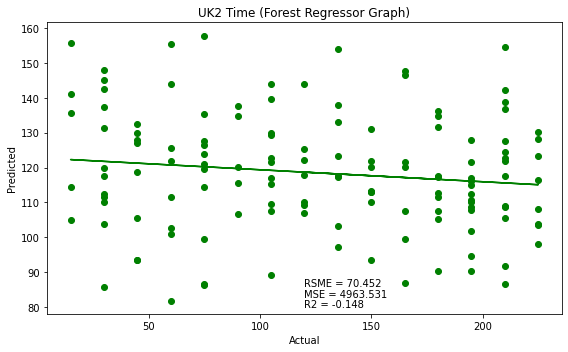

In [ ]:
from matplotlib.pyplot import figure
fig23, ax23 = plt.subplots(1,1 ,figsize=(8,5),  constrained_layout=False)

ax23.scatter(arr1, rand_pred1, color='green')
ax23.plot(arr1, LinearRegression().fit(arr1, rand_pred1).predict(arr1), color='green')
ax23.set_title('UK2 Time (Forest Regressor Graph)')
ax23.set_xlabel('Actual')
ax23.set_ylabel('Predicted')

ax23.annotate("R2 = {:.3f}".format(r2_score(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average')), (120, 80))
ax23.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (120, 83))
ax23.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (120, 86))

fig23.tight_layout()
plt.show()

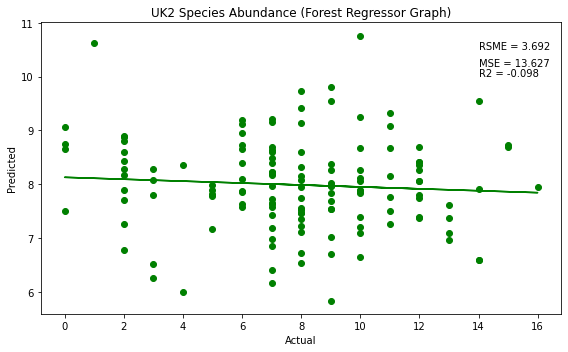

In [ ]:
fig24, ax24 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax24.scatter(arr2, rand_pred2, color='green')
ax24.plot(arr2, LinearRegression().fit(arr2, rand_pred2).predict(arr2), color='green')
#ax24.plot(arr2, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr2, rand_pred2).predict(arr2), color='green')
ax24.set_title('UK2 Species Abundance (Forest Regressor Graph)')
ax24.set_xlabel('Actual')
ax24.set_ylabel('Predicted')

ax24.annotate("R2 = {:.3f}".format(r2_score(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average')), (14, 10))
ax24.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (14, 10.2))
ax24.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (14, 10.5))

fig24.tight_layout()
plt.show()

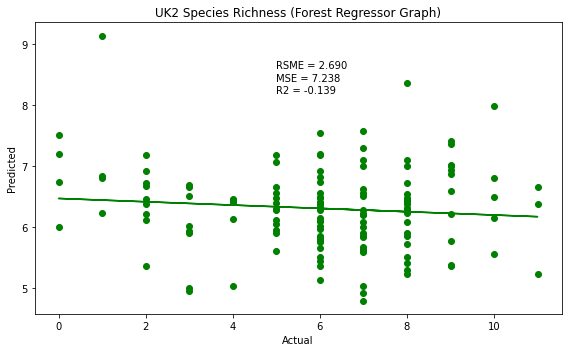

In [ ]:
fig25, ax25 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax25.scatter(arr3, rand_pred3, color='green')
ax25.plot(arr3, LinearRegression().fit(arr3, rand_pred3).predict(arr3), color='green')
#ax25.plot(arr3, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr3, rand_pred3).predict(arr3), color='green')
ax25.set_title('UK2 Species Richness (Forest Regressor Graph)')
ax25.set_xlabel('Actual')
ax25.set_ylabel('Predicted')

ax25.annotate("R2 = {:.3f}".format(r2_score(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average')), (5, 8.2))
ax25.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (5, 8.4))
ax25.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (5, 8.6))

fig25.tight_layout()
plt.show()

#### ForestRegression UK3

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
UK3_meta_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2)
UK3_meta_reg.fit(UK3_train_metadata,UK3_train_metalabels)

#prediction and accuracy score
import sklearn.metrics as metrics
UK3_rand_pred = UK3_meta_reg.predict(UK3_test_metadata)


In [ ]:
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(UK3_test_metalabels,UK3_rand_pred,sample_weight=None, multioutput='uniform_average'))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK3_test_metalabels, UK3_rand_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(UK3_test_metalabels, UK3_rand_pred, sample_weight=None, multioutput='uniform_average', squared=False))

-0.12734288039659428
1558.579606263923
24.391799443474515


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(UK3_test_metalabels.shape[0]):
  arr1.append(UK3_test_metalabels[i][0])
  arr2.append(UK3_test_metalabels[i][1])
  arr3.append(UK3_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

rand_pred1 = []
rand_pred2 = []
rand_pred3 = []
for i in range(UK3_rand_pred.shape[0]):
  rand_pred1.append(UK3_rand_pred[i][0])
  rand_pred2.append(UK3_rand_pred[i][1])
  rand_pred3.append(UK3_rand_pred[i][2])

print(rand_pred1)
print(rand_pred2)
print(rand_pred3)

[15, 15, 105, 225, 180, 225, 15, 165, 195, 105, 105, 165, 225, 165, 150, 210, 180, 180, 225, 225, 165, 195, 120, 60, 60, 150, 30, 210, 120, 75, 210, 60, 165, 195, 135, 75, 45, 150, 105, 210, 105, 15, 195, 120, 150, 15, 120, 225, 75, 165, 165, 90, 165, 210, 180, 90, 60, 180, 120, 210, 75, 30, 225, 195, 75, 165, 225, 180, 165, 135, 120, 105, 180, 75, 120, 165, 75, 30, 30, 120, 195, 195, 45, 90, 105, 165, 120, 90, 45, 150, 135, 135, 210, 15, 195, 195, 75, 60, 60, 150, 195, 90, 15, 90, 90, 180, 45, 135, 30, 150, 210, 15, 150, 15, 165, 15, 75, 210, 105, 30, 60, 180, 135, 45, 210, 165, 225, 60, 30, 105, 75, 180, 45, 225, 105]
[0, 1, 5, 0, 1, 3, 5, 5, 0, 5, 8, 4, 3, 3, 1, 8, 4, 7, 3, 2, 5, 8, 1, 3, 5, 0, 1, 2, 0, 2, 2, 5, 4, 3, 5, 3, 1, 5, 1, 3, 10, 1, 2, 3, 7, 0, 2, 2, 4, 7, 3, 5, 2, 0, 4, 3, 1, 2, 1, 2, 1, 2, 0, 2, 3, 3, 9, 3, 5, 0, 2, 2, 4, 5, 8, 5, 4, 1, 0, 9, 2, 7, 0, 6, 8, 8, 5, 0, 2, 8, 7, 1, 4, 0, 3, 2, 7, 2, 2, 4, 3, 0, 2, 5, 2, 7, 0, 2, 1, 4, 3, 0, 6, 1, 2, 0, 5, 6, 2, 0, 5, 7, 5, 0

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
rand_pred1 = np.array(rand_pred1)
rand_pred2 = np.array(rand_pred2)
rand_pred3 = np.array(rand_pred3)

In [ ]:
arr1, rand_pred1 = arr1.reshape(-1,1), rand_pred1.reshape(-1,1)
arr2, rand_pred2 = arr2.reshape(-1,1), rand_pred2.reshape(-1,1)
arr3, rand_pred3 = arr3.reshape(-1,1), rand_pred3.reshape(-1,1)

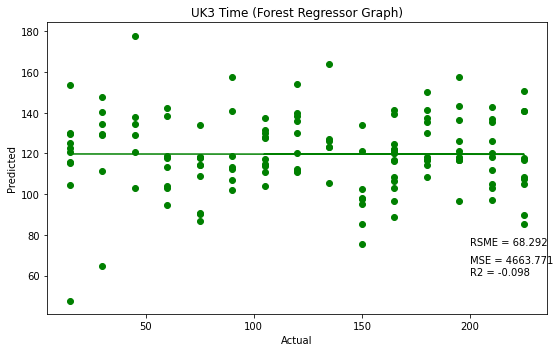

In [ ]:
from matplotlib.pyplot import figure
fig26, ax26 = plt.subplots(1,1 ,figsize=(8,5),  constrained_layout=False)

ax26.scatter(arr1, rand_pred1, color='green')
ax26.plot(arr1, LinearRegression().fit(arr1, rand_pred1).predict(arr1), color='green')
#ax26.plot(arr1, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr1, rand_pred2).predict(arr1), color='green')
ax26.set_title('UK3 Time (Forest Regressor Graph)')
ax26.set_xlabel('Actual')
ax26.set_ylabel('Predicted')

ax26.annotate("R2 = {:.3f}".format(r2_score(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average')), (200, 60))
ax26.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (200, 66))
ax26.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (200, 75))

fig26.tight_layout()
plt.show()

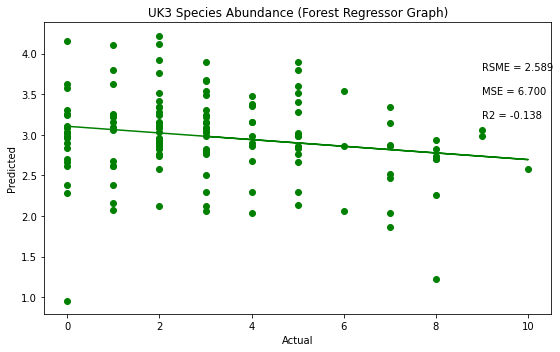

In [ ]:
fig27, ax27 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax27.scatter(arr2, rand_pred2, color='green')
ax27.plot(arr2, LinearRegression().fit(arr2, rand_pred2).predict(arr2), color='green')
#ax27.plot(arr2, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr2, rand_pred2).predict(arr2), color='green')
ax27.set_title('UK3 Species Abundance (Forest Regressor Graph)')
ax27.set_xlabel('Actual')
ax27.set_ylabel('Predicted')

ax27.annotate("R2 = {:.3f}".format(r2_score(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average')), (9, 3.2))
ax27.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (9, 3.5))
ax27.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (9, 3.8))

fig27.tight_layout()
plt.show()

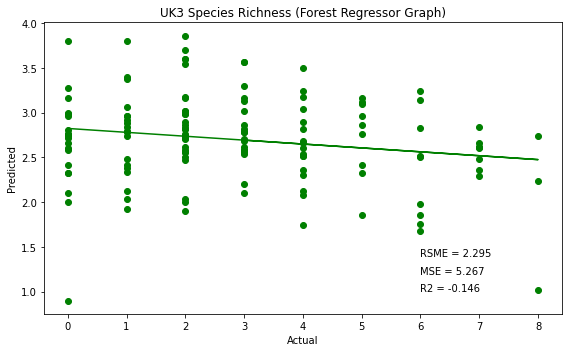

In [ ]:
fig28, ax28 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax28.scatter(arr3, rand_pred3, color='green')
ax28.plot(arr3, LinearRegression().fit(arr3, rand_pred3).predict(arr3), color='green')
#ax28.plot(arr3, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr3, rand_pred3).predict(arr3), color='green')
ax28.set_title('UK3 Species Richness (Forest Regressor Graph)')
ax28.set_xlabel('Actual')
ax28.set_ylabel('Predicted')

ax28.annotate("R2 = {:.3f}".format(r2_score(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average')), (6, 1))
ax28.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (6, 1.2))
ax28.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (6, 1.4))

fig28.tight_layout()
plt.show()

#### ForestRegression EC1

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
EC1_meta_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2)
EC1_meta_reg.fit(EC1_train_metadata,EC1_train_metalabels)

#prediction and accuracy score
import sklearn.metrics as metrics
EC1_rand_pred = EC1_meta_reg.predict(EC2_test_metadata)


In [ ]:
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(EC1_test_metalabels,EC1_rand_pred,sample_weight=None, multioutput='uniform_average'))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC1_test_metalabels, EC1_rand_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC1_test_metalabels, EC1_rand_pred, sample_weight=None, multioutput='uniform_average', squared=False))

-0.08531159747265793
50956.71855655988
131.78981118042947


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(EC1_test_metalabels.shape[0]):
  arr1.append(EC1_test_metalabels[i][0])
  arr2.append(EC1_test_metalabels[i][1])
  arr3.append(EC1_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

rand_pred1 = []
rand_pred2 = []
rand_pred3 = []
for i in range(EC1_rand_pred.shape[0]):
  rand_pred1.append(EC1_rand_pred[i][0])
  rand_pred2.append(EC1_rand_pred[i][1])
  rand_pred3.append(EC1_rand_pred[i][2])

print(rand_pred1)
print(rand_pred2)
print(rand_pred3)

[747, 752, 772, 787, 2, 12, 22, 762, 27, 762, 762, 747, 752, 7, -13, 37, 737, 762, 757, 762, 22, 767, 37, 737, 752, 762, 22, 27, 32, 2, 2, 722, 12, 772, 32, 747, 737, 742, 52, 32, 722, 7, 722, 752, 52, 767, 737, 787, 762, 17, 2, 2, -13, 12, 722, 7, 7, 52, -13, 772, 2, 7, 752, 762, 7, 752, 17, 52, 37, 12, 12, 27, 787, 7, 32, 52, 772, 767, 787, 17, 742, 742, 12, 772, 772, 52, 2, 762, 32, 737, 22, 722, 757, 737, 722, 772, 2, 747, 7, 787, 787, 7, 27, 772, 767, 52, 52, 747, 787, 22, 7, 747, 742, 752, 772, 767, 757, 52, 2, 767, 757, 787, 7, 752, 17, 7, 22, 752, 17, 2, -13, 772, 52, 742, -13, 787, 752, 722, 12, 7, 32, 27, 737, 2, 17, 757, 17, 17, 2, 752, -13, -13, 12, 2, 52, 32, 767, 12, 737, 12, 37, -13, 37, 722, 752, 742, 787, 787, 752, -13, 17, 22, 52, 52, 737, 32, 742, 7, 757, 767]
[1, 1, 0, 0, 3, 9, 5, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 4, 6, 2, 4, 3, 3, 0, 3, 1, 0, 0, 6, 0, 5, 5, 4, 0, 0, 0, 4, 0, 0, 0, 5, 5, 3, 2, 0, 5, 8, 0, 1, 0, 5, 5, 0, 0, 4, 0, 3, 3, 5, 6,

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
rand_pred1 = np.array(rand_pred1)
rand_pred2 = np.array(rand_pred2)
rand_pred3 = np.array(rand_pred3)

In [ ]:
arr1, rand_pred1 = arr1.reshape(-1,1), rand_pred1.reshape(-1,1)
arr2, rand_pred2 = arr2.reshape(-1,1), rand_pred2.reshape(-1,1)
arr3, rand_pred3 = arr3.reshape(-1,1), rand_pred3.reshape(-1,1)

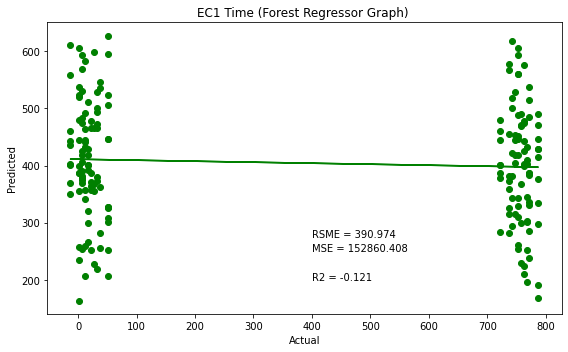

In [ ]:
from matplotlib.pyplot import figure
fig29, ax29 = plt.subplots(1,1 ,figsize=(8,5),  constrained_layout=False)

ax29.scatter(arr1, rand_pred1, color='green')
ax29.plot(arr1, LinearRegression().fit(arr1, rand_pred1).predict(arr1), color='green')
#ax29.plot(arr1, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr1, rand_pred1).predict(arr1), color='green')
ax29.set_title('EC1 Time (Forest Regressor Graph) ')
ax29.set_xlabel('Actual')
ax29.set_ylabel('Predicted')

ax29.annotate("R2 = {:.3f}".format(r2_score(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average')), (400, 200))
ax29.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (400, 250))
ax29.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (400, 275))

fig29.tight_layout()
plt.show()

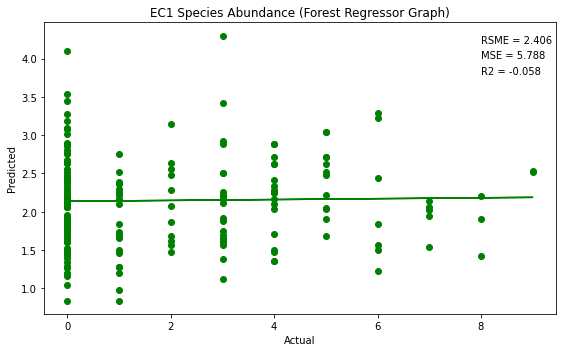

In [ ]:
fig30, ax30 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax30.scatter(arr2, rand_pred2, color='green')
ax30.plot(arr2, LinearRegression().fit(arr2, rand_pred2).predict(arr2), color='green')
#ax30.plot(arr2, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr2, rand_pred2).predict(arr2), color='green')
ax30.set_title('EC1 Species Abundance (Forest Regressor Graph)')
ax30.set_xlabel('Actual')
ax30.set_ylabel('Predicted')

ax30.annotate("R2 = {:.3f}".format(r2_score(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average')), (8, 3.8))
ax30.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (8, 4))
ax30.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (8, 4.2))

fig30.tight_layout()
plt.show()

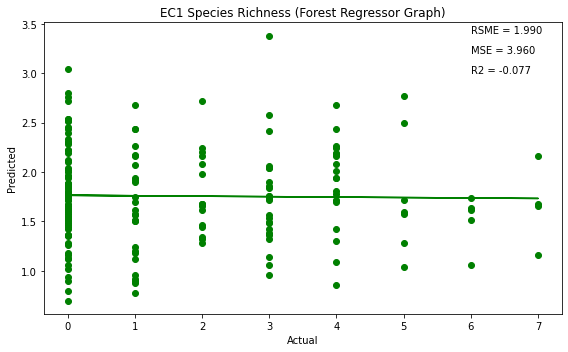

In [ ]:
fig31, ax31 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax31.scatter(arr3, rand_pred3, color='green')
ax31.plot(arr3, LinearRegression().fit(arr3, rand_pred3).predict(arr3), color='green')
#ax31.plot(arr3, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr3, rand_pred3).predict(arr3), color='green')
ax31.set_title('EC1 Species Richness (Forest Regressor Graph)')
ax31.set_xlabel('Actual')
ax31.set_ylabel('Predicted')

ax31.annotate("R2 = {:.3f}".format(r2_score(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average')), (6, 3.0))
ax31.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (6, 3.2))
ax31.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (6, 3.4))

fig31.tight_layout()
plt.show()

#### ForestRegression EC2

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
EC2_meta_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2)
EC2_meta_reg.fit(EC2_train_metadata,EC2_train_metalabels)

#prediction and accuracy score
import sklearn.metrics as metrics
EC2_rand_pred = EC2_meta_reg.predict(EC2_test_metadata)


In [ ]:
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(EC2_test_metalabels,EC2_rand_pred,sample_weight=None, multioutput='uniform_average'))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC2_test_metalabels, EC2_rand_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC2_test_metalabels, EC2_rand_pred, sample_weight=None, multioutput='uniform_average', squared=False))

-0.059135763874738734
48565.32097393004
129.15115490218562


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(EC2_test_metalabels.shape[0]):
  arr1.append(EC2_test_metalabels[i][0])
  arr2.append(EC2_test_metalabels[i][1])
  arr3.append(EC2_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

rand_pred1 = []
rand_pred2 = []
rand_pred3 = []
for i in range(EC2_rand_pred.shape[0]):
  rand_pred1.append(EC2_rand_pred[i][0])
  rand_pred2.append(EC2_rand_pred[i][1])
  rand_pred3.append(EC2_rand_pred[i][2])

print(rand_pred1)
print(rand_pred2)
print(rand_pred3)

[32, 737, 22, 747, 757, 22, 722, 17, 2, 17, 762, 37, 767, 2, 37, 742, 7, 787, 2, 12, 787, 787, 747, 742, 2, 2, 22, 2, 767, 757, 767, 752, 747, 32, 767, 12, 17, 767, 722, 722, 52, 722, 22, 37, 752, 762, 17, 752, 12, 722, 772, -13, 752, 737, 52, 787, 37, 32, 2, 22, 17, 767, 37, 752, 12, 772, 767, -13, -13, 752, 772, 37, 52, 37, 37, 787, 32, 747, 27, 787, 747, 52, 32, 787, 37, 17, 17, 722, 22, 742, 52, 737, 772, 12, 2, 752, 52, 772, 37, 17, 742, 752, 37, 747, 722, 787, 7, 752, 2, 767, 757, 742, 2, 757, 32, -13, 757, 742, 742, 52, 747, 52, 737, -13, 787, 767, 742, 772, -13, 27, 12, 767, 12, -13, 742, 742, 22, 22, 52, 27, 742, 747, 52, 787, 787, 752, 7, 32, 17, -13, 7, 32, 32, 17, 752, 22, 27, 52, 787, 757, 32, 747, 2, 7, 742, 32, 762, 757, 722, 22, 762, 787, 742, 7, 22, 772, 2, 32, 757, 787]
[4, 1, 3, 0, 0, 5, 2, 12, 7, 4, 0, 2, 0, 7, 5, 1, 3, 0, 4, 10, 0, 0, 1, 1, 3, 6, 11, 1, 0, 0, 0, 0, 0, 3, 0, 2, 7, 0, 0, 1, 4, 1, 8, 8, 1, 0, 4, 0, 4, 1, 0, 3, 1, 2, 6, 0, 5, 0, 6, 3, 4, 0, 6, 1, 5, 0,

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
rand_pred1 = np.array(rand_pred1)
rand_pred2 = np.array(rand_pred2)
rand_pred3 = np.array(rand_pred3)

In [ ]:
arr1, rand_pred1 = arr1.reshape(-1,1), rand_pred1.reshape(-1,1)
arr2, rand_pred2 = arr2.reshape(-1,1), rand_pred2.reshape(-1,1)
arr3, rand_pred3 = arr3.reshape(-1,1), rand_pred3.reshape(-1,1)

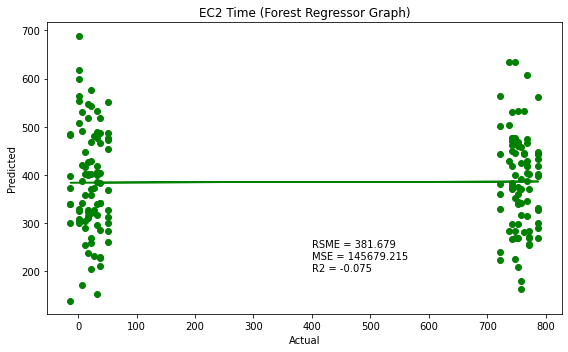

In [ ]:
from matplotlib.pyplot import figure
fig32, ax32 = plt.subplots(1,1 ,figsize=(8,5),  constrained_layout=False)

ax32.scatter(arr1, rand_pred1, color='green')
ax32.plot(arr1, LinearRegression().fit(arr1, rand_pred1).predict(arr1), color='green')
#ax32.plot(arr1, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr1, rand_pred1).predict(arr1), color='green')
ax32.set_title('EC2 Time (Forest Regressor Graph)')
ax32.set_xlabel('Actual')
ax32.set_ylabel('Predicted')

ax32.annotate("R2 = {:.3f}".format(r2_score(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average')), (400, 200))
ax32.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (400, 225))
ax32.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (400, 250))

fig32.tight_layout()
plt.show()

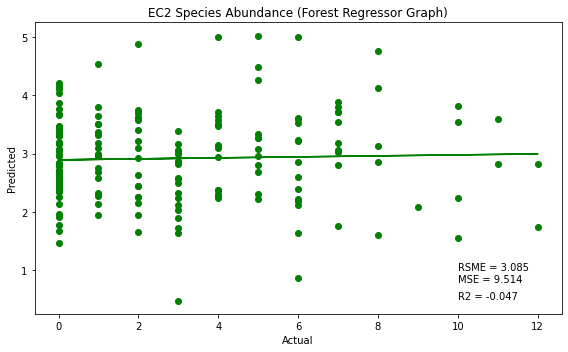

In [ ]:
fig33, ax33 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax33.scatter(arr2, rand_pred2, color='green')
ax33.plot(arr2, LinearRegression().fit(arr2, rand_pred2).predict(arr2), color='green')
#ax33.plot(arr2, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr2, rand_pred2).predict(arr2), color='green')
ax33.set_title('EC2 Species Abundance (Forest Regressor Graph)')
ax33.set_xlabel('Actual')
ax33.set_ylabel('Predicted')

ax33.annotate("R2 = {:.3f}".format(r2_score(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average')), (10, 0.5))
ax33.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (10, 0.8))
ax33.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 1))

fig33.tight_layout()
plt.show()

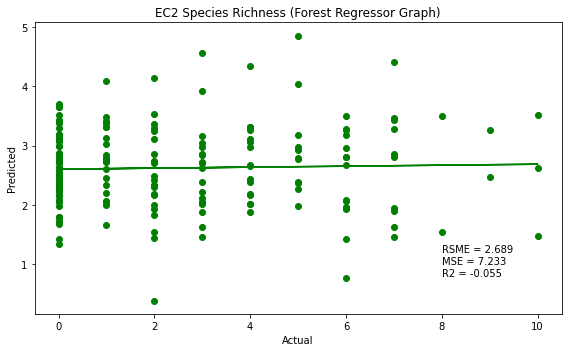

In [ ]:
fig34, ax34 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax34.scatter(arr3, rand_pred3, color='green')
ax34.plot(arr3, LinearRegression().fit(arr3, rand_pred3).predict(arr3), color='green')
#ax34.plot(arr3, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr3, rand_pred3).predict(arr3), color='green')
ax34.set_title('EC2 Species Richness (Forest Regressor Graph)')
ax34.set_xlabel('Actual')
ax34.set_ylabel('Predicted')

ax34.annotate("R2 = {:.3f}".format(r2_score(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average')), (8, 0.8))
ax34.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (8, 1))
ax34.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (8, 1.2))

fig34.tight_layout()
plt.show()

#### ForestRegression EC3

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
EC3_meta_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2)
EC3_meta_reg.fit(EC3_train_metadata,EC3_train_metalabels)

#prediction and accuracy score
import sklearn.metrics as metrics
EC3_rand_pred = EC3_meta_reg.predict(EC3_test_metadata)


In [ ]:
#R2 Socre
from sklearn.metrics import r2_score
print(r2_score(EC3_test_metalabels,EC3_rand_pred,sample_weight=None, multioutput='uniform_average'))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC3_test_metalabels, EC3_rand_pred, sample_weight=None, multioutput='uniform_average', squared=True))
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(EC3_test_metalabels, EC3_rand_pred, sample_weight=None, multioutput='uniform_average', squared=False))

-0.09322175691972061
51214.553708380474
132.58545405416942


In [ ]:
arr1 = []
arr2 = []
arr3 = []
for i in range(EC3_test_metalabels.shape[0]):
  arr1.append(EC3_test_metalabels[i][0])
  arr2.append(EC3_test_metalabels[i][1])
  arr3.append(EC3_test_metalabels[i][2])

print(arr1)
print(arr2)
print(arr2)

rand_pred1 = []
rand_pred2 = []
rand_pred3 = []
for i in range(EC3_rand_pred.shape[0]):
  rand_pred1.append(EC3_rand_pred[i][0])
  rand_pred2.append(EC3_rand_pred[i][1])
  rand_pred3.append(EC3_rand_pred[i][2])

print(rand_pred1)
print(rand_pred2)
print(rand_pred3)

[767, 2, 12, 52, 17, 37, 752, -13, 757, 7, 762, 772, 747, 737, 37, 52, 742, 772, 787, 747, 2, 12, 757, 747, 7, 742, 22, 7, 752, 752, 2, 787, 52, 752, 772, 2, 772, 32, 737, 37, 2, 742, 2, 7, 17, 22, 17, 787, 772, 767, 742, 32, 742, 762, 722, 762, 2, 747, 37, 7, 742, 737, 772, 12, 12, 17, -13, 787, 762, -13, 722, 787, 32, 742, 772, 742, 762, 17, 52, 32, 757, 32, 22, 27, 747, 762, 7, 752, 7, 737, 7, 32, 32, -13, 17, 772, 737, 32, 52, 762, 12, 12, 52, 37, 7, 772, 2, 27, 772, 772, 742, 767, 762, 722, 17, 747, 767, 787, 27, 767, 22, 27, 787, 747, 772, 7, 12, 767, 767, 737, 12, 27, 32, 752, 52, 32, 22, 787, 752, 767, 2, 22, 752, 2, 787, 722, 757, 772, 2, 7, 12, 37, 2, 32, 52, 787, 27, 757, 12, 52, 7, 12, 742, 17, 762, 2, 757, 762, 772, 52, 2, 747, 17, -13, 737, 52, 767, 767, 17, 787]
[0, 8, 9, 7, 5, 5, 0, 4, 0, 4, 0, 0, 0, 0, 2, 6, 3, 1, 0, 0, 5, 10, 0, 0, 3, 3, 5, 8, 1, 0, 7, 0, 7, 1, 0, 4, 2, 1, 0, 0, 2, 3, 5, 12, 7, 8, 5, 0, 2, 0, 6, 8, 0, 0, 3, 0, 9, 0, 7, 6, 0, 0, 0, 6, 6, 2, 7, 0, 0, 4,

In [ ]:
arr1 = np.array(arr1)
arr2 = np.array(arr2)
arr3 = np.array(arr3)
rand_pred1 = np.array(rand_pred1)
rand_pred2 = np.array(rand_pred2)
rand_pred3 = np.array(rand_pred3)

In [ ]:
arr1, rand_pred1 = arr1.reshape(-1,1), rand_pred1.reshape(-1,1)
arr2, rand_pred2 = arr2.reshape(-1,1), rand_pred2.reshape(-1,1)
arr3, rand_pred3 = arr3.reshape(-1,1), rand_pred3.reshape(-1,1)

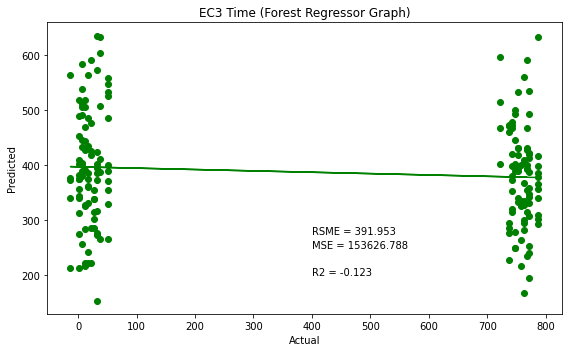

In [ ]:
from matplotlib.pyplot import figure
fig35, ax35 = plt.subplots(1,1 ,figsize=(8,5),  constrained_layout=False)

ax35.scatter(arr1, rand_pred1, color='green')
ax35.plot(arr1, LinearRegression().fit(arr1, rand_pred1).predict(arr1), color='green')
#ax35.plot(arr1, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr1, rand_pred1).predict(arr1), color='green')
ax35.set_title('EC3 Time (Forest Regressor Graph)')
ax35.set_xlabel('Actual')
ax35.set_ylabel('Predicted')

ax35.annotate("R2 = {:.3f}".format(r2_score(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average')), (400, 200))
ax35.annotate("MSE = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=True)), (400, 250))
ax35.annotate("RSME = {:.3f}".format(mean_squared_error(arr1, rand_pred1, sample_weight=None, multioutput='uniform_average', squared=False)), (400, 275))

fig35.tight_layout()
plt.show()

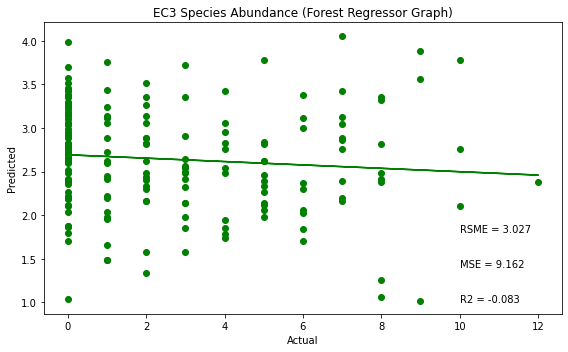

In [ ]:
fig36, ax36 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax36.scatter(arr2, rand_pred2, color='green')
ax36.plot(arr2, LinearRegression().fit(arr2, rand_pred2).predict(arr2), color='green')
#ax36.plot(arr2, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr2, rand_pred2).predict(arr2), color='green')
ax36.set_title('EC3 Species Abundance (Forest Regressor Graph)')
ax36.set_xlabel('Actual')
ax36.set_ylabel('Predicted')

ax36.annotate("R2 = {:.3f}".format(r2_score(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average')), (10, 1))
ax36.annotate("MSE = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=True)), (10, 1.4))
ax36.annotate("RSME = {:.3f}".format(mean_squared_error(arr2, rand_pred2, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 1.8))

fig36.tight_layout()
plt.show()

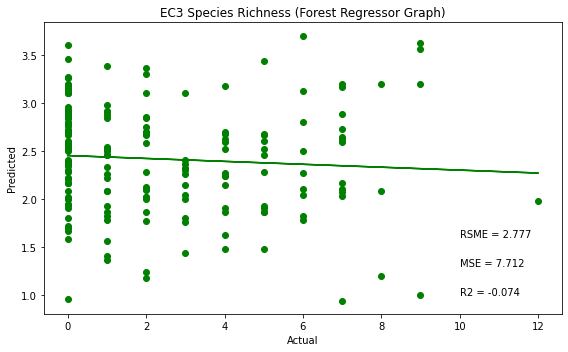

In [ ]:
fig37, ax37 = plt.subplots(1,1 ,figsize=(8,5), constrained_layout=False)

ax37.scatter(arr3, rand_pred3, color='green')
ax37.plot(arr3, LinearRegression().fit(arr3, rand_pred3).predict(arr3), color='green')
#ax37.plot(arr3, RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=2).fit(arr3, rand_pred3).predict(arr3), color='green')
ax37.set_title('EC3 Species Richness (Forest Regressor Graph)')
ax37.set_xlabel('Actual')
ax37.set_ylabel('Predicted')

ax37.annotate("R2 = {:.3f}".format(r2_score(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average')), (10, 1))
ax37.annotate("MSE = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=True)), (10, 1.3))
ax37.annotate("RSME = {:.3f}".format(mean_squared_error(arr3, rand_pred3, sample_weight=None, multioutput='uniform_average', squared=False)), (10, 1.6))

fig37.tight_layout()
plt.show()

### Tensor Flow 
Using metadata and averaged segments. Simple architecture using fully connected layers and dropout.

In [ ]:
#Traintest Split in preparation for tensorflow model and linear regression
train_metadata, test_metadata, train_metalabels, test_metalabels  = train_test_split(representations, hab_health, test_size=0.2, random_state=1)

In [ ]:
train_metadata.shape, test_metadata.shape, train_metalabels.shape, test_metalabels.shape

((3780, 128), (945, 128), (3780, 4), (945, 4))

In [ ]:
# TensorFlow and tf.keras
# Creating a model to predict labels and see how well model performs compared 
# to normal regression task
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds

add audio representation

In [ ]:
#Functional API model 
rep_input = keras.Input(shape=[128], name="representations")
dense = layers.Dense(256, activation="relu")
x = dense(rep_input)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
hab_lab = layers.Dense(3, name="habitat_health")(x)
habs = layers.Dense(6, name= "habitats")(x)

2022-04-14 14:02:36.736368: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [ ]:
#keras model
model = keras.Model(inputs=[rep_input], outputs=[hab_lab, habs], name="hab_model")

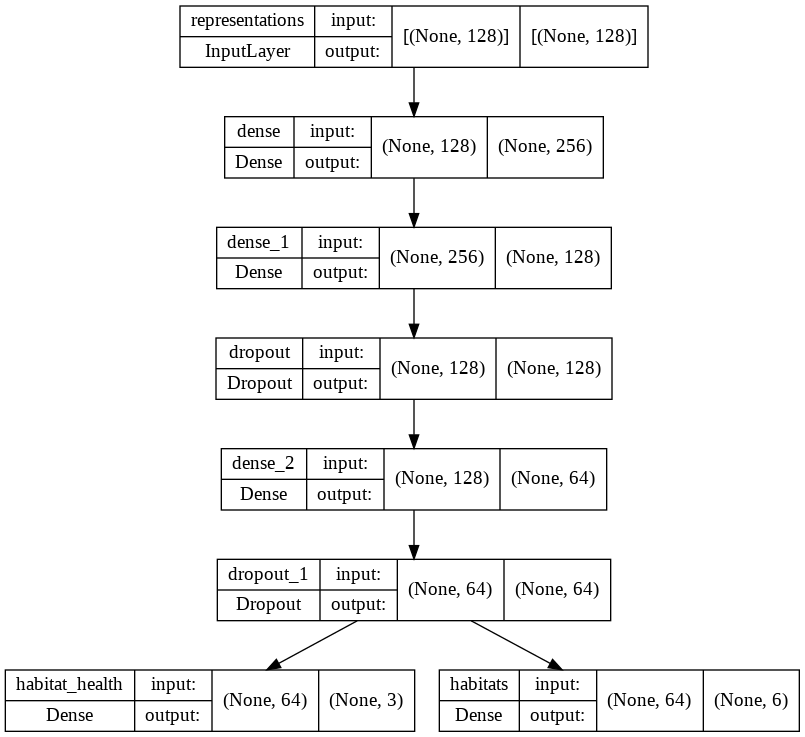

In [ ]:
#outlining model as shown in the report
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
#model compilation with different types of loss for different types of output
model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    loss={
        "habitat_health": keras.losses.MeanSquaredError(),
        "habitats": keras.losses.SparseCategoricalCrossentropy(),
    },
    loss_weights={"habitat_health": 1.0, "habitats": 1.0},
)

In [ ]:
#attempts at making the two separate outputs compile and work together 
train_metalabels = tf.convert_to_tensor(train_metalabels, dtype=tf.float32)
test_metalabels = tf.convert_to_tensor(test_metalabels, dtype=tf.float32)

In [ ]:
# train the network to perform multi-output classification
model.fit(x=train_metadata,
	y={"habitat_health": train_metalabels, "habitats": train_metalabels},
	validation_data=(test_metadata,
		{"habitat_health": test_metalabels, "habitats": test_metalabels}),
	epochs=50,
	verbose=1)
# save the model to disk
print("[INFO] serializing network...")

In [ ]:
# Using Dummy input data - unsuccessful 
representation_data = np.random.randint(train_metadata, size=(3780, 128))

# Dummy target data
habitat_h = np.random.random(size=(4725, 3))
habitat = np.random.choice(1, size=(4725, 6))

model.fit(
    {"representations": representation_data},
    {"habitat_health" : habitat_info, "habitats": habitat},
    epochs=50,
    batch_size=32,
)

In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
health_data = np.random.randint(, size=(1280, 100))
habitat_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

In [ ]:
train_metadata = np.asarray(train_metadata).astype(np.float32)
train_metalabels = np.asarray(train_metalabels).astype(np.string_)

In [ ]:
#model fitting based on two epochs 
print("Fit model on training data")
history = model.fit(
    train_metadata,
    train_metalabels,
    batch_size=64,
    epochs=2,
)

In [ ]:
history.history

In [ ]:
# Evaluate the model on the test data using evaluate
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

In [ ]:
#model summary
model.summary()

#### Train data

In [ ]:
#Potential Training loop - unsuccessful
train_loss = []
train_acc = []

num_epochs = 100

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_metadata:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Tracking progress 
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

In [ ]:
#plotting different metrics including loss and accuracy
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

#### Test data

In [ ]:
#similar supposed approach for test data
test_accuracy = tf.keras.metrics.Accuracy()
test_metadata = test_metadata.batch(10)

for (x, y) in test_metadata:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

In [ ]:
# Dummy input data
habitat_data = np.random(hab_labels, size=(4725, 1))
habitat_info_data = np.random.randint(hab_health2, size=(4725, 3))

# Dummy target data
habitat_info = np.random.random(size=(4725, 3))
habitat = np.random.randint(1, size=(4725, 6))

model.fit(
    {"Habitat Info": habitat_info_data, "Habitat": habitat_data},
    {"habitat_health" : habitat_info, "habitats": habitat},
    epochs=2,
    batch_size=32,
)

In [ ]:
#specifying model fitting
net = model.fit(train_metadata, train_metalabels, epochs=10)

In [ ]:
#evaluation step
test_loss, test_acc = model.evaluate(test_metadata,  test_metalabels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Model([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_metalabels)

In [ ]:
#attempt at custom loss function - unsuccessful
def custom_loss(test_metadata, test_labels):
  # calculating squared difference between target and predicted values 
    loss = K.square(y_pred - y_true)  # (batch_size, 2)
    
    # multiplying the values with weights along batch dimension
    loss = loss * [0.3, 0.7]          # (batch_size, 2)
                
    # summing both loss values along batch dimension 
    loss = K.sum(loss, axis=1)        # (batch_size,)
    
    return loss

## Experimenting

Some code snippets needed for experimenting and playing around with the data set

In [ ]:
#converting meta data to numpy to simplify work with UMAP
#Slicing, extracting and finding values in numpy easier than in pandas
meta_data_np = meta_data.to_numpy()
EC_time1 = meta_data_np[np.where(meta_data_np[:,7] == 'EC1')]
EC_time2 = meta_data_np[np.where(meta_data_np[:,7] == 'EC2')]
EC_time3 = meta_data_np[np.where(meta_data_np[:,7] == 'EC3')]
EC_time3.shape

(900, 151)

In [ ]:
EC_time = np.concatenate((EC_time1, EC_time2, EC_time3), axis=0)

In [ ]:
#converting Ecuador time from absolute time to minutes before/after sunrise
#now identical to time in UK and allows for better comparison within umap and 
#regression models
EC_c = EC_time[:,9] 
print(EC_c)
#treating numbers as string - multiply values upfront by 60 to change to minutes
#then add values already in minutes (always last two digits)
#then subtract by 373 (sunrise in ecuador in minutes) to receive minutes
EC_c2 = []
#for time values in time ecuador list
for time in EC_c:
  if(len(str(time)) == 3): #add zero to all time values with length of 3
    timeStr = "0" + str(time)
  else:
    timeStr = str(time)
  temp = timeStr[0] + timeStr[1]
  timeH = 60 * int(temp)

  temp2 = timeStr[2] + timeStr[3]
  time = timeH + int(temp2)

  timeT = time - 373
  EC_c2.append(timeT)


print(len(EC_c2))
print(EC_c2)

[705 1850 1905 ... 1815 615 645]
2700
[52, 757, 772, 22, 27, 722, 12, 772, 752, 2, 772, 757, 757, 722, 2, -13, 787, 762, 2, 7, 22, 767, 787, 757, 752, 772, 767, 742, 12, 12, 742, 772, 32, 7, 12, 767, 17, 772, 757, 757, 737, 747, 762, 747, 787, 742, 7, 2, 27, 12, 722, 52, 17, 52, 747, 722, 7, -13, 722, 787, 52, 752, 742, 787, 37, 752, 737, 737, 27, 767, 722, -13, 37, 12, 772, 52, 752, 787, 52, 767, 737, 772, 742, 32, 52, 17, 752, 7, 2, 722, 747, 737, 52, 722, 787, 12, 772, 742, 752, 7, 2, 2, -13, 767, 762, 12, 7, 737, 787, 752, 22, 17, 752, 22, 22, -13, 772, 742, 762, 37, 762, -13, 757, 742, 747, 7, 722, 762, 752, 17, 762, 752, 787, 32, 2, 757, 747, 32, 2, 762, 37, 757, 52, 747, 767, 37, 22, 767, 737, 2, 742, 787, 762, 757, 52, 17, 757, -13, 772, 772, 17, 757, 767, 752, 22, 27, 27, 772, 737, 22, 22, -13, 22, 12, 747, 12, 787, 757, 762, 742, 2, 32, 747, 742, 12, 2, 772, 737, 757, 7, 7, 37, 12, 767, 772, 762, 32, -13, 747, -13, 757, 22, 52, 12, 757, 7, 772, 742, 772, 772, -13, 52, 742, 76

In [ ]:
EC1_time = EC_c2[0:900]
EC2_time = EC_c2[900:1800]
EC3_time = EC_c2[1800:2700]
print(len(EC1_time))
print(len(EC2_time))
print(len(EC3_time))

900
900
900


In [ ]:
ECC1_time = np.array(EC1_time)
ECC2_time = np.array(EC2_time)
ECC3_time = np.array(EC3_time)
print(ECC1_time)
print(ECC2_time)
print(ECC3_time)
print(ECC1_time.shape)
print(ECC2_time.shape)
print(ECC3_time.shape)
#ECC_time = np.concatenate((ECC1_time, ECC2_time, ECC3_time), axis=0)
#EC_time[:,9] = ECC_time
#EC_time[:,9]

[ 52 757 772  22  27 722  12 772 752   2 772 757 757 722   2 -13 787 762
   2   7  22 767 787 757 752 772 767 742  12  12 742 772  32   7  12 767
  17 772 757 757 737 747 762 747 787 742   7   2  27  12 722  52  17  52
 747 722   7 -13 722 787  52 752 742 787  37 752 737 737  27 767 722 -13
  37  12 772  52 752 787  52 767 737 772 742  32  52  17 752   7   2 722
 747 737  52 722 787  12 772 742 752   7   2   2 -13 767 762  12   7 737
 787 752  22  17 752  22  22 -13 772 742 762  37 762 -13 757 742 747   7
 722 762 752  17 762 752 787  32   2 757 747  32   2 762  37 757  52 747
 767  37  22 767 737   2 742 787 762 757  52  17 757 -13 772 772  17 757
 767 752  22  27  27 772 737  22  22 -13  22  12 747  12 787 757 762 742
   2  32 747 742  12   2 772 737 757   7   7  37  12 767 772 762  32 -13
 747 -13 757  22  52  12 757   7 772 742 772 772 -13  52 742 762   2 787
  22 747  27  17  27   2 767 747   7 737 742  22 757 722  12 -13 742 787
  12 787 742 772  32 -13 722  37  12 742 -13 752 72

In [ ]:
UK1 = []
UK2 = []
UK3 = []
EC1 = []
EC2 = []
EC3 = []
for meta in meta_data:
  if meta_data['habitat'] == 'UK1':
    UK1.append(meta_data)
  if meta_data['habitat'] == 'UK2':
    UK2.append(meta_data)
  if meta_data['habitat'] == 'UK3':
    UK3.append(meta_data)
  if meta_data['habitat'] == 'EC1':  
    EC1.append(meta_data)
  if meta_data['habitat'] == 'EC2': 
    EC2.append(meta_data)
  if meta_data['habitat'] == 'EC3':  
    EC3.append(meta_data)     
    

In [ ]:
#Habitat specific UMAP

np.extract(, array)

for rep in representations:
  if 

  for hab in hab_labels:
    fig, (ax1, ax2, ax2) = plt.subplots()
    hab_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, 
                    n_components=2).fit(representations)
  
  ax1.set_title('Time UK1 UMAP')
  ax2.set_title('Species Abundance UK1 UMAP')
  ax3.set_title('Species Richness UK1 UMAP')
  ax1.legend(loc= 'best')
  ax2.legend(loc= 'best')
  ax3.legend(loc= 'best')

  umap.plot.points(hab_mapper, time, ax=ax1)
  umap.plot.points(hab_mapper, species_abundance, ax=ax2)
  umap.plot.points(hab_mapper, species_richness, ax=ax3)

In [ ]:
for representations in representations
  select all representations that are not uk1 in habitat and remove the rest
    then assign that array to representations so it can be modified using the umap 
    find time, sa, sr values and create umap


In [ ]:
for represent in representations:
  fig, ax = plt.subplots()
  hab_mapper = umap.UMAP(metric='euclidean', min_dist=0.2, n_neighbors=25, random_state=0, 
                   n_components=2).fit(representations)

  umap.plot.points(hab_mapper, time, ax=ax)
  umap.plot.points(hab_mapper, species_abundance, ax=ax)
  umap.plot.points(hab_mapper, species_richness, ax=ax)

In [ ]:

#4 Visualising the Regression results (for higher resolution and #smoother curve)

plt.scatter(arr2, rand_pred2, color = 'red')
#plt.plot(arr2, meta_reg.predict(arr2), color = 'blue')
plt.title('Check It (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Converting to numpy to simplify tensorflow work
time = time.to_numpy()
species_abundance = species_abundance.to_numpy()
species_richness = species_richness.to_numpy()
hab_labels = hab_labels.to_numpy()
print(time)
print(species_abundance)
print(species_richness)